In [126]:
from scipy import stats

import os
if not os.getcwd().endswith('modules'):
    os.chdir('modules')
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from preprocessing_utils import get_drugs_list
from conf import DISEASE, MITH_IN_DRUG, MITH_OUT_DRUG, CS_OUT, \
 TSR_OUT_DRUG,TSR_OUT_DISEASE, TSR_OUT_CSCORE,IMG_DIR, alias_2geneid
from loader import load_disease_signature, load_single_drug_signature, load_drug_signatures
from plot_drugs_signatures_correlations import compare_deg_and_mith_genes,  prop_agreeing_signs, print_correlations, plot_correlation, plot_10_most_correlated
print(DISEASE)

def plot_hist(DEG_cs_data=False, mith_cs_data=False, colname='connectivity_score', pert_times=['6h','24h','6h_24h']):
 
    for pert_time in pert_times:
        if not type(DEG_cs_data)==bool:
            plt.hist(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time][colname], label='DEG', alpha=0.8, bins=100)
            print(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time].shape)
        if not type(mith_cs_data)==bool:
            print(mith_cs_data[mith_cs_data.perturbation_time==pert_time].shape)
            plt.hist(mith_cs_data[mith_cs_data.perturbation_time==pert_time][colname], label='mith', alpha=0.5, bins=100)
        
        plt.grid(linestyle='--')
        plt.xlim(-2,2)
        plt.title(pert_time)
        plt.legend()
        plt.show()



als_NYGC


# Data exploration and comparison of als_NYGC DEG vs Mith3 data

## Gene mapping step:

mithril3 mithril takes gene IDs as input (only gene names returns 0s), returns both gene ids and gene names

Genes not in mapping: 198

tot duplicated gene symbols: 480. Of which, 478 have different FC values!

all duplicated genes and all genes without mapping were removed from Mithril input (see 2_mith3_name_to_id_map.py)

## full DEG data :
disease (als_NYGC) 

In [2]:
DEG_signature_disease=pd.read_csv(TSR_OUT_DISEASE+DISEASE+'/'+DISEASE+'_signature.csv', sep=';',decimal=',')

In [3]:
DEG_signature_disease

,gene,DE_log2_FC,std.error,t.value,p.value,adj.p.value
0,A1BG,-0.459544,0.036604,-12.554584,3.373364e-34,1.804816e-33
1,A1BG-AS1,-0.441504,0.031497,-14.017444,1.151264e-41,1.230281e-40
2,A2M,-0.047244,0.041011,-1.151999,2.495349e-01,2.690094e-01
3,A2M-AS1,0.100756,0.027493,3.664782,2.575899e-04,3.360389e-04
4,A2ML1,-0.160588,0.039118,-4.105223,4.291411e-05,5.819310e-05
...,...,...,...,...,...,...
16281,ZXDC,-0.169468,0.020013,-8.467693,6.707634e-17,1.488088e-16
16282,ZYG11B,0.434426,0.031167,13.938710,3.049818e-41,3.121894e-40
16283,ZYX,-0.343439,0.035157,-9.768855,8.509685e-22,2.313282e-21
16284,ZZEF1,-0.342677,0.020517,-16.702121,6.982294e-57,9.974881e-55


# filtered DEG data:
disease (als_NYGC) 

In [107]:
DEG_signature_disease_gene_id=load_disease_signature(DISEASE)
DEG_signature_disease_gene_id

,gene,DE_log2_FC,std.error,t.value,p.value,adj.p.value,gene_id
0,A1BG,-0.459544,0.036604,-12.554584,3.373364e-34,1.804816e-33,1
1,A1BG-AS1,-0.441504,0.031497,-14.017444,1.151264e-41,1.230281e-40,503538
2,A2M,-0.047244,0.041011,-1.151999,2.495349e-01,2.690094e-01,3494
3,A2M-AS1,0.100756,0.027493,3.664782,2.575899e-04,3.360389e-04,144571
4,A2ML1,-0.160588,0.039118,-4.105223,4.291411e-05,5.819310e-05,144568
...,...,...,...,...,...,...,...
15106,ZXDC,-0.169468,0.020013,-8.467693,6.707634e-17,1.488088e-16,79364
15107,ZYG11B,0.434426,0.031167,13.938710,3.049818e-41,3.121894e-40,79699
15108,ZYX,-0.343439,0.035157,-9.768855,8.509685e-22,2.313282e-21,7791
15109,ZZEF1,-0.342677,0.020517,-16.702121,6.982294e-57,9.974881e-55,23140


## Mith 3 data
disease (als_NYGC) 

In [108]:
filename=DISEASE+'_mith3_signature.csv'
mith_signature_disease=load_disease_signature(DISEASE, mith=True)
mith_signature_disease

,gene_id,gene,Perturbation,p.value,adj.p.value,t.value_like_statistic
0,6197,RPS6KA3,0.331857,0.015992,0.074966,1969.00
1,chebi:456216,ADP(3-),3.108631,0.000005,0.000035,2000.99
2,6196,RPS6KA2,-0.325460,0.403798,0.532985,1193.00
3,chebi:30616,ATP(4-),4.390928,0.000005,0.000035,2000.99
4,5594,MAPK1,0.372222,0.001000,0.006272,1999.00
...,...,...,...,...,...,...
14842,9247,GCM2,-0.000003,0.189905,0.357244,1621.00
14843,4666,NACA,0.186799,0.239880,0.410156,1521.00
14844,8521,GCM1,-0.000084,0.288356,0.449277,1424.00
14845,gl:G00711,(GlcA)1 (GlcNAc)2,-0.066815,0.522239,0.611799,956.00


In [6]:
len(mith_signature_disease['gene_id'].unique())==len(mith_signature_disease['gene_id'])

True

In [7]:
len(mith_signature_disease['gene_id'].unique())

14847

# Note: 
Genes in mithril3 are actually genes, microRNas AND metabolites.

Always refer to gene id column

do not trust 'gene' column, since it has some duplicates among the metabolytes:

In [9]:
len(mith_signature_disease['gene'].unique())

14833

In [10]:
# duplicated metabolites names (but they have different gene IDs so I kept them):
# if they appear more than once, it means they have more than one duplicate
mith_signature_disease['gene'][mith_signature_disease['gene'].duplicated()]


592                     (GlcNAc)5 (Man)3 (Asn)1
684       (Gal)1 (GalNAc)1 (Neu5Ac)1 (Ser/Thr)1
700       (Gal)1 (GalNAc)1 (GlcNAc)1 (Ser/Thr)1
701              (GalNAc)1 (GlcNAc)1 (Ser/Thr)1
704       (Gal)1 (GalNAc)1 (GlcNAc)1 (Ser/Thr)1
722                Dolichyl phosphate D-mannose
744                 (GlcNAc)1 (Man)1 (Ser/Thr)1
885                UDP-N-acetyl-D-galactosamine
1707               UDP-N-acetyl-D-galactosamine
14103                                      GD1a
14309                                   nLc5Cer
14350                                       APC
14555                          Lactosylceramide
14571    (Gal)4 (Glc)1 (GlcNAc)3 (LFuc)2 (Cer)1
Name: gene, dtype: object

In [11]:
mith_signature_disease.loc[684]

gene_id                                               gl:G00026
gene                      (Gal)1 (GalNAc)1 (Neu5Ac)1 (Ser/Thr)1
Perturbation                                          -0.043721
p.value                                                 0.24088
adj.p.value                                            0.411416
t.value_like_statistic                                   1519.0
Name: 684, dtype: object

In [12]:
mith_signature_disease.loc[700]

gene_id                                               gl:G00025
gene                      (Gal)1 (GalNAc)1 (GlcNAc)1 (Ser/Thr)1
Perturbation                                           0.208844
p.value                                                0.114943
adj.p.value                                            0.319939
t.value_like_statistic                                   1771.0
Name: 700, dtype: object

## Comparison of genes missing from mithril output bur present in DEG (filtered for duplicates and gene id) data:

In [109]:
DEG_disease_common, mith_disease_common=compare_deg_and_mith_genes(DEG_signature_disease_gene_id, mith_signature_disease)

missing genes from mithril 7560
addional_mith_items 7296
genes in common 7551
riprova: common genes+ additional mithril items == len(mithril_gene)? True
riprova: common genes+ missing mithril items == len(DEG_genees)? True


## Which of these mithril data are metabolytes and miRNAs?

In [116]:
# since all gene_ids are present in alias_2geneid dictionary, those that are not will necessarily be small molecules
disease_signature_sm  = mith_signature_disease[~mith_signature_disease['gene_id'].isin([str(x) for x in alias_2geneid.values()])]
disease_signature_sm

,gene_id,gene,Perturbation,p.value,adj.p.value,t.value_like_statistic
1,chebi:456216,ADP(3-),3.108631,0.000005,0.000035,2000.99
3,chebi:30616,ATP(4-),4.390928,0.000005,0.000035,2000.99
15,chebi:43474,hydrogenphosphate,17.024662,0.000005,0.000035,2000.99
16,cpd:C00001,H2O,7.069654,0.000005,0.000035,2000.99
26,hsa-miR-199b-3p,hsa-miR-199b-3p,-0.000850,0.757621,0.831843,485.00
...,...,...,...,...,...,...
14836,gl:G13150,(GlcN)1 (Ino(acyl)-P)1 (Man)3 (EtN)3 (P)3 (pro...,0.051553,0.271864,0.435500,1457.00
14837,gl:G10610,UDP-N-acetyl-D-glucosamine,-0.000005,0.189905,0.357244,1621.00
14839,gl:G13151,(GlcN)1 (Man)3 (EtN)3 (P)3 (protein)1 (Ino-P)1,0.116952,0.325337,0.477440,1350.00
14845,gl:G00711,(GlcA)1 (GlcNAc)2,-0.066815,0.522239,0.611799,956.00


In [ ]:
plt.hist(mith_signature_disease['t.value_like_statistic'], label='P statistic', alpha=0.5)
plt.title('mith3 signature statistic')

Text(0.5, 1.0, 'mith3 signature Pvalue')

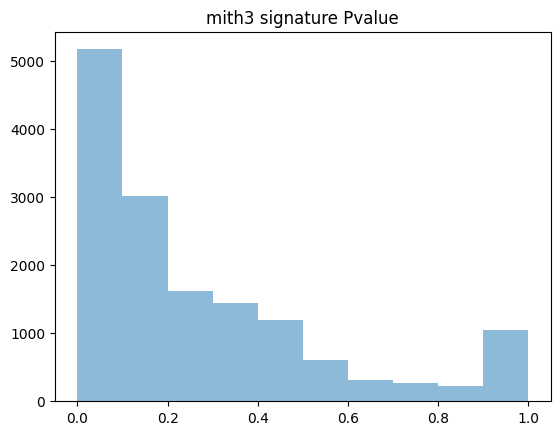

In [79]:
plt.hist(mith_signature_disease['p.value'], label='P statistic', alpha=0.5)
plt.title('mith3 signature Pvalue')

In [80]:
# histograms with cmmon genes

C:\Users\los4\AppData\Local\Temp\ipykernel_25736\1879850479.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


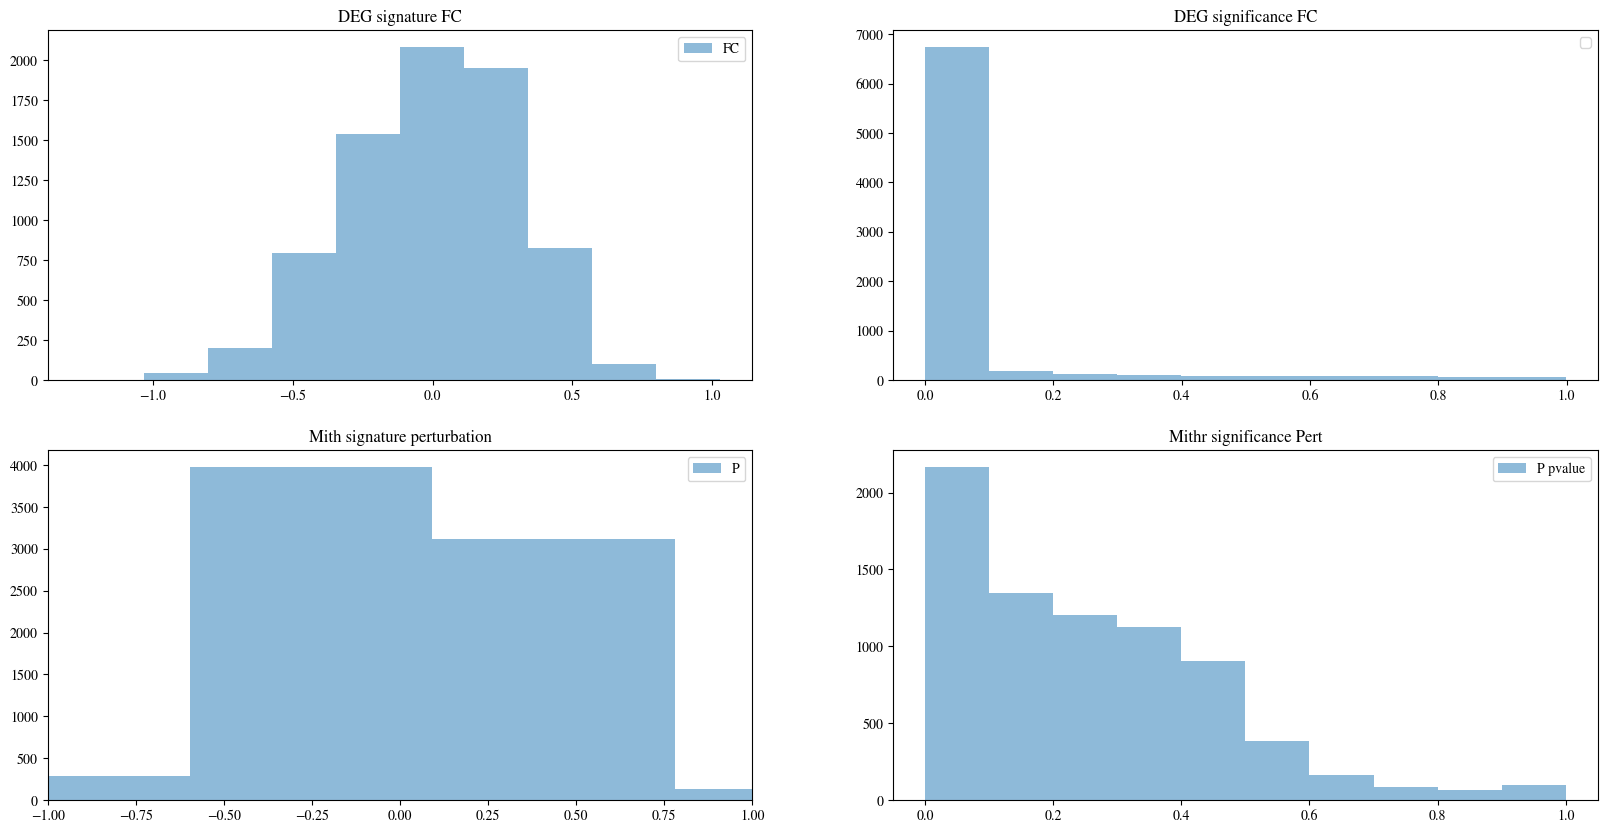

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(DEG_disease_common['DE_log2_FC'], label='FC', alpha=0.5)
ax[1,0].hist(mith_disease_common['Perturbation'], label='P', alpha=0.5)
ax[1,0].set_xlim(-1,1)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(DEG_disease_common['p.value'], label='FC pvalue', alpha=0.5)
ax[1,1].hist(mith_disease_common['p.value'], label='P pvalue', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[1,0].legend()
ax[1,1].legend()



In [82]:
# controllare metaboliti e mirna significativita e foldchange

FC più spread out, pvalue piu uniformi, Perturbations piu uniformi, pvalue più bimodali

## Correlations between DEG and perturbations
for common genes between tsr data and mithril data

Pearson cc: PearsonRResult(statistic=np.float64(-0.007984470119363788), pvalue=np.float64(0.4878586859373582)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.012520188902465144), pvalue=np.float64(0.27667325881023375))


(PearsonRResult(statistic=np.float64(-0.007984470119363788), pvalue=np.float64(0.4878586859373582)),
 SignificanceResult(statistic=np.float64(-0.012520188902465144), pvalue=np.float64(0.27667325881023375)))

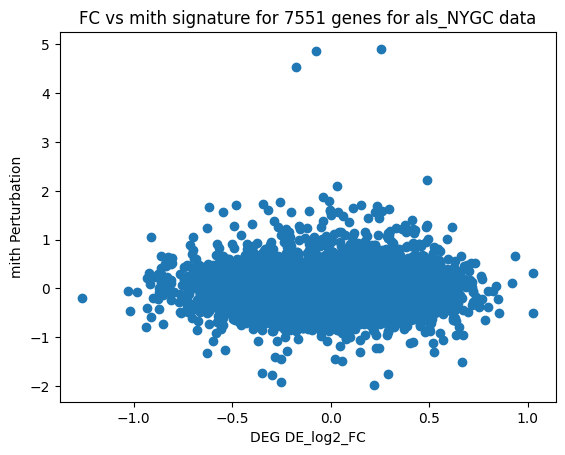

In [85]:
print_correlations(DEG_disease_common,  mith_disease_common,\
                       DEG_col='DE_log2_FC', mith_col='Perturbation',data_name=DISEASE)

In [86]:
DEG_signature_disease_gene_id.columns

Index(['gene', 'DE_log2_FC', 'std.error', 't.value', 'p.value', 'adj.p.value',
       'gene_id'],
      dtype='object')

Pearson cc: PearsonRResult(statistic=np.float64(0.0019465994188978064), pvalue=np.float64(0.8656984676250867)) 
Spearman cc: SignificanceResult(statistic=np.float64(0.013347565767044703), pvalue=np.float64(0.24616434982841276))


(PearsonRResult(statistic=np.float64(0.0019465994188978064), pvalue=np.float64(0.8656984676250867)),
 SignificanceResult(statistic=np.float64(0.013347565767044703), pvalue=np.float64(0.24616434982841276)))

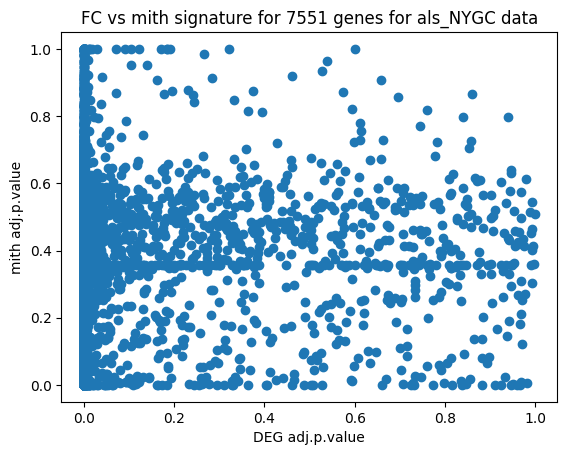

In [87]:
print_correlations(DEG_disease_common,  mith_disease_common,\
                       DEG_col='adj.p.value', mith_col='adj.p.value',data_name=DISEASE)

In [88]:
# tanti dei geni significativi per tsr non lo sono per mithril!

## Is there a correlation between signs?

In [89]:
mith_disease_common['sign']=mith_disease_common.Perturbation.apply(lambda x : np.where(x>0,1,0))
DEG_disease_common['sign']=DEG_disease_common.DE_log2_FC.apply(lambda x : np.where(x>0,1,0))

prop_agreeing_signs(DEG_disease_common, mith_disease_common, sign_col='sign')

/tmp/ipykernel_14059/1758225976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mith_disease_common['sign']=mith_disease_common.Perturbation.apply(lambda x : np.where(x>0,1,0))
/tmp/ipykernel_14059/1758225976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEG_disease_common['sign']=DEG_disease_common.DE_log2_FC.apply(lambda x : np.where(x>0,1,0))


0.9470268838564428

YES!

## Are there other non linear correlations between mithril perturbations and tsr fold change data?

not that I could find

# Data exploraiton and comparison of ipf DEG vs mith data

TODO 

# 2 LINCS drugs data exploration:
## Data exploration and comparison of LINCS drugs, DEG vs mith3 data
LINCS data is sorted by 3222 drugs, 3 timesteps (perturbation times of 6, 24 and metanalysis)

## Gene mapping step:

mithril3 mithril takes gene IDs as input (only gene names returns 0s), returns both gene ids and gene names


-2 genes not found in symbol: gene id mapping

-280 duplicate gene ids removed

all duplicated genes and all genes without mapping were removed from Mithril input

see preproc_utils.py section "filter DEG drug signatures by only keeping non duplicate gene ids" for more info


## DEG LINCS data


DEG Drug wise ordering of metanalysis files, converted from gene-wise ordering of metanalysis files

In [3]:
drugs_DEG_signatures= load_drug_signatures(mith=False, pkl=False)

loading all drug signatures...
12 drugs loaded


In [20]:
drugs_DEG_signatures.drug.unique()

array(['oligomycin-a', 'ibuprofen', 'RHO-kinase-inhibitor-III[rockout]',
       'amitriptyline', 'hydrastine-(1r,-9s)', 'ibuprofen-(S)',
       'zuclopenthixol', '1,2,3,4,5,6-hexabromocyclohexane',
       "7,4'-dihydroxyflavone", 'pseudoephedrine', 'umbelliferone',
       'morphothebaine', '4-carboxy-3-hydroxyphenylglycine-(RS)'],
      dtype=object)

## Using a single random drug as example:
ex_drug='pseudoephedrine'

In [110]:
ex_drug='ibuprofen'
ex_drug_DEG_signature=load_single_drug_signature(ex_drug)
ex_drug_DEG_signature

,gene,drug,DE_log2_FC_6h,std.error_6h,t.value_6h,p.value_6h,adj.p.value_6h,DE_log2_FC_24h,std.error_24h,t.value_24h,p.value_24h,adj.p.value_24h,DE_log2_FC_6h_24h,std.error_6h_24h,t.value_6h_24h,p.value_6h_24h,gene_id
0,A2M,ibuprofen,-0.139099,0.175280,-0.793584,0.427438,0.773377,0.098812,0.215370,0.458799,0.646379,0.875154,-0.044305,0.135947,-0.325898,0.744501,3494
1,A4GALT,ibuprofen,0.017596,0.045795,0.384221,0.700815,0.961708,0.108390,0.055132,1.966020,0.049296,0.354559,0.057804,0.045100,1.281686,0.199953,53947
2,AAAS,ibuprofen,0.006481,0.047413,0.136694,0.891273,0.967995,-0.038132,0.051690,-0.737698,0.460698,0.752341,-0.013903,0.034940,-0.397918,0.690691,8086
3,AACS,ibuprofen,-0.203467,0.088995,-2.286280,0.022238,0.167407,0.141628,0.104720,1.352441,0.176234,0.527720,-0.035333,0.172491,-0.204841,0.837697,65985
4,AADAC,ibuprofen,0.001028,0.091233,0.011271,0.991007,0.996773,0.081372,0.108646,0.748965,0.453879,0.873966,0.034253,0.069867,0.490267,0.623945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,ZWINT,ibuprofen,0.024556,0.086021,0.285462,0.775290,0.928499,-0.089084,0.116352,-0.765638,0.443892,0.648332,-0.015606,0.069170,-0.225622,0.821496,11130
9888,ZXDC,ibuprofen,0.018349,0.052044,0.352563,0.724416,0.931824,-0.042083,0.062343,-0.675034,0.499654,0.850002,-0.006470,0.039953,-0.161950,0.871345,79364
9889,ZYX,ibuprofen,-0.019286,0.110654,-0.174288,0.861639,0.972092,0.024716,0.126751,0.194999,0.845394,0.965121,-0.000255,0.083358,-0.003054,0.997563,7791
9890,ZZEF1,ibuprofen,-0.013113,0.063412,-0.206786,0.836177,0.950943,0.145124,0.075533,1.921326,0.054691,0.347137,0.060684,0.078939,0.768742,0.442047,23140


## mith3 LINCS data

mith3 output filtering: (see map_mith3_output_to_metanalysis_drug_wise.py)

REMOVING drugs with special characters: 35 drugs, 

IGNORING synonym (non unique) gene symbols (9 (ignorati per ora)),

Convert into connectivity calculation input:
input: DRUG_timestep.perturbation.txt,
57422 rows × 8 columns (Pathway Id 	Pathway Name 	Gene Id 	Gene Name 	Perturbation 	Accumulator 	pValue 	adj_pValue)
every row is one gene  per one patwhay.
Maps to tsr metanalysis file pronto per essere preso in input dal connectivity score, concatenando i 3 timestep perturbations, e levando le pathway e tenendo una row per gene (geni uguali in pathway diverse hanno la stessa perturbation value ,quindi il mith3 output è i nrealta pieno di doppioni), e agginugendo una t-value like statistic (chè non è proprio uguale al tvalue xke il tvalue ha anche il segno)

In [111]:
ex_drug_mith_signature = load_single_drug_signature(ex_drug, mith=True)
ex_drug_mith_signature

,gene_id,Gene Name,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,t.value_like_statistic_6h,Perturbation_24h,p.value_24h,adj.p.value_24h,t.value_like_statistic_24h,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h,t.value_like_statistic_6h_24h
0,6197,RPS6KA3,1.087537e-01,0.062969,0.441941,ibuprofen,1875.0,-1.721500e-01,0.105447,0.440939,1790.0,-2.627640e-02,0.371814,0.498151,1257.0
1,chebi:456216,ADP(3-),-1.017390e-02,0.473763,0.506086,ibuprofen,1053.0,7.152828e-03,0.357321,0.492112,1286.0,-3.029717e-03,0.564218,0.567881,872.0
2,6196,RPS6KA2,-1.371505e-01,0.050975,0.436496,ibuprofen,1899.0,1.683930e-01,0.069965,0.410894,1861.0,7.991304e-03,0.399800,0.498151,1201.0
3,chebi:30616,ATP(4-),1.895099e-02,0.267366,0.503885,ibuprofen,1466.0,-4.508233e-02,0.197901,0.469262,1605.0,-1.112970e-02,0.363818,0.498151,1273.0
4,5594,MAPK1,7.515743e-02,0.160920,0.486640,ibuprofen,1679.0,-1.841981e-01,0.110445,0.442828,1780.0,-4.983415e-02,0.271364,0.498151,1458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,9247,GCM2,-2.307885e-16,0.251874,0.503885,ibuprofen,1497.0,8.428887e-16,0.068966,0.408858,1863.0,2.892601e-16,0.186907,0.482619,1627.0
14808,4666,NACA,4.174681e-03,0.455772,0.503885,ibuprofen,1089.0,2.734241e-02,0.347326,0.492112,1306.0,1.344146e-02,0.372314,0.498151,1256.0
14809,8521,GCM1,4.167701e-04,0.150425,0.486640,ibuprofen,1700.0,-1.118257e-03,0.036982,0.374044,1927.0,-2.923421e-04,0.203398,0.488594,1594.0
14810,gl:G00711,(GlcA)1 (GlcNAc)2,-4.422689e-03,0.271364,0.503885,ibuprofen,1458.0,-5.170225e-04,0.547726,0.552028,905.0,-2.849762e-03,0.364818,0.498151,1271.0


In [4]:
drugs_mith_signatures=load_drug_signatures(mith=True)
drugs_mith_signatures

loading all drug signatures...
14 drugs loaded


,gene_id,Gene Name,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,t.value_like_statistic_6h,Perturbation_24h,p.value_24h,adj.p.value_24h,t.value_like_statistic_24h,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h,t.value_like_statistic_6h_24h
0,6197,RPS6KA3,1.166345e-01,0.148926,0.421803,"1,2,3,4,5,6-hexabromocyclohexane",1703.0,4.810935e-02,0.372314,0.490269,1256.0,8.422022e-02,0.176412,0.447086,1648.0
1,chebi:456216,ADP(3-),-1.279543e-01,0.092454,0.412072,"1,2,3,4,5,6-hexabromocyclohexane",1816.0,2.165494e-02,0.456272,0.497606,1088.0,-5.603689e-02,0.188906,0.447086,1623.0
2,6196,RPS6KA2,-9.637914e-02,0.209895,0.447363,"1,2,3,4,5,6-hexabromocyclohexane",1581.0,-2.326261e-01,0.047476,0.369890,1906.0,-1.617915e-01,0.051974,0.381866,1897.0
3,chebi:30616,ATP(4-),-1.170227e-04,0.501749,0.507913,"1,2,3,4,5,6-hexabromocyclohexane",997.0,9.668510e-02,0.052974,0.369890,1895.0,4.488744e-02,0.141929,0.447086,1717.0
4,5594,MAPK1,-8.449864e-02,0.253873,0.456871,"1,2,3,4,5,6-hexabromocyclohexane",1493.0,-8.897120e-03,0.448276,0.497606,1104.0,-5.040975e-02,0.294853,0.475580,1411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,9247,GCM2,-3.554938e-16,0.160420,0.443108,zuclopenthixol,1680.0,1.677124e-17,0.491254,0.522880,1018.0,-1.534860e-16,0.333333,0.473540,1334.0
14808,4666,NACA,-5.276766e-02,0.289355,0.464751,zuclopenthixol,1422.0,-6.408476e-02,0.269865,0.482792,1461.0,-5.848053e-02,0.235382,0.443928,1530.0
14809,8521,GCM1,2.035769e-05,0.505247,0.533567,zuclopenthixol,990.0,-1.661438e-04,0.321839,0.484709,1357.0,-7.213164e-05,0.369815,0.482114,1261.0
14810,gl:G00711,(GlcA)1 (GlcNAc)2,5.507306e-03,0.196902,0.443108,zuclopenthixol,1607.0,-8.971647e-03,0.204398,0.480108,1592.0,-1.834473e-03,0.433783,0.498308,1133.0


# Note (same as for disease mith data): 
Genes in mithril3 are actually genes, microRNas AND metabolites.

Always refer to gene id column

do not trust 'gene' column, since it has some duplicates among the metabolytes:

In [22]:
len(ex_drug_mith_signature['gene_id'].unique())==len(ex_drug_mith_signature['gene_id'])

True

In [23]:
# duplicated metabolites names (but they have different gene IDs so I kept them):
# if they appear more than once, it means they have more than one duplicate
ex_drug_mith_signature['Gene Name'][ex_drug_mith_signature['Gene Name'].duplicated()]

592                     (GlcNAc)5 (Man)3 (Asn)1
707                Dolichyl phosphate D-mannose
864                UDP-N-acetyl-D-galactosamine
1686               UDP-N-acetyl-D-galactosamine
14068                                      GD1a
14274                                   nLc5Cer
14315                                       APC
14520                          Lactosylceramide
14536    (Gal)4 (Glc)1 (GlcNAc)3 (LFuc)2 (Cer)1
Name: Gene Name, dtype: object

In [24]:
ex_drug_mith_signature['Gene Name'][ex_drug_mith_signature['Gene Name']=='UDP-N-acetyl-D-galactosamine']

657     UDP-N-acetyl-D-galactosamine
864     UDP-N-acetyl-D-galactosamine
1686    UDP-N-acetyl-D-galactosamine
Name: Gene Name, dtype: object

## confronto genes e gene ids tra mith e deg di drug


In [112]:
ex_drug_DEG_common, ex_drug_mith_common = compare_deg_and_mith_genes(ex_drug_DEG_signature, ex_drug_mith_signature)

missing genes from mithril 3269
addional_mith_items 8189
genes in common 6623
riprova: common genes+ additional mithril items == len(mithril_gene)? True
riprova: common genes+ missing mithril items == len(DEG_genees)? True


## Which of these mith3 genes are small molecules?

In [115]:
ex_drug_signature_sm  = ex_drug_mith_signature[~ex_drug_mith_signature['gene_id'].isin([str(x) for x in alias_2geneid.values()])]
ex_drug_signature_sm

,gene_id,Gene Name,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,t.value_like_statistic_6h,Perturbation_24h,p.value_24h,adj.p.value_24h,t.value_like_statistic_24h,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h,t.value_like_statistic_6h_24h
1,chebi:456216,ADP(3-),-1.017390e-02,0.473763,0.506086,ibuprofen,1053.0,7.152828e-03,0.357321,0.492112,1286.0,-3.029717e-03,0.564218,0.567881,872.0
3,chebi:30616,ATP(4-),1.895099e-02,0.267366,0.503885,ibuprofen,1466.0,-4.508233e-02,0.197901,0.469262,1605.0,-1.112970e-02,0.363818,0.498151,1273.0
15,chebi:43474,hydrogenphosphate,-8.011544e-03,0.351824,0.503885,ibuprofen,1297.0,-4.181110e-03,0.508746,0.525945,983.0,-5.970232e-03,0.428786,0.498700,1143.0
16,cpd:C00001,H2O,-1.976145e-04,0.505747,0.515392,ibuprofen,989.0,-3.504612e-03,0.389305,0.492112,1222.0,-1.572925e-03,0.426787,0.498151,1147.0
26,hsa-miR-199b-3p,hsa-miR-199b-3p,-5.026252e-04,0.391304,0.503885,ibuprofen,1218.0,-5.686974e-03,0.024988,0.350250,1951.0,-2.514572e-03,0.088456,0.447047,1824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14801,gl:G13150,(GlcN)1 (Ino(acyl)-P)1 (Man)3 (EtN)3 (P)3 (pro...,-2.500788e-02,0.415292,0.503885,ibuprofen,1170.0,5.097550e-02,0.268366,0.487239,1464.0,1.233389e-02,0.342329,0.498151,1316.0
14802,gl:G10610,UDP-N-acetyl-D-glucosamine,-3.547451e-17,0.503748,0.515392,ibuprofen,993.0,9.413219e-16,0.057971,0.395491,1885.0,3.973849e-16,0.102949,0.450871,1795.0
14804,gl:G13151,(GlcN)1 (Man)3 (EtN)3 (P)3 (protein)1 (Ino-P)1,6.932992e-02,0.155922,0.486640,ibuprofen,1689.0,5.578393e-02,0.281359,0.487901,1438.0,6.391798e-02,0.135932,0.467239,1729.0
14810,gl:G00711,(GlcA)1 (GlcNAc)2,-4.422689e-03,0.271364,0.503885,ibuprofen,1458.0,-5.170225e-04,0.547726,0.552028,905.0,-2.849762e-03,0.364818,0.498151,1271.0


almost the same number as the disease ones:

In [124]:
n=0
for ex_drug_sm in list(ex_drug_signature_sm['gene_id']):
    if not ex_drug_sm in list(disease_signature_sm['gene_id']):
        n+=1
print(n, 'small molecules in drug and not in disease')

0 small molecules in drug and not in disease


But still, different molecules. Interesting

## Compare Perturbation vs FC data for one drug for 6h timepoint

On all data:

/tmp/ipykernel_14059/4184396059.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


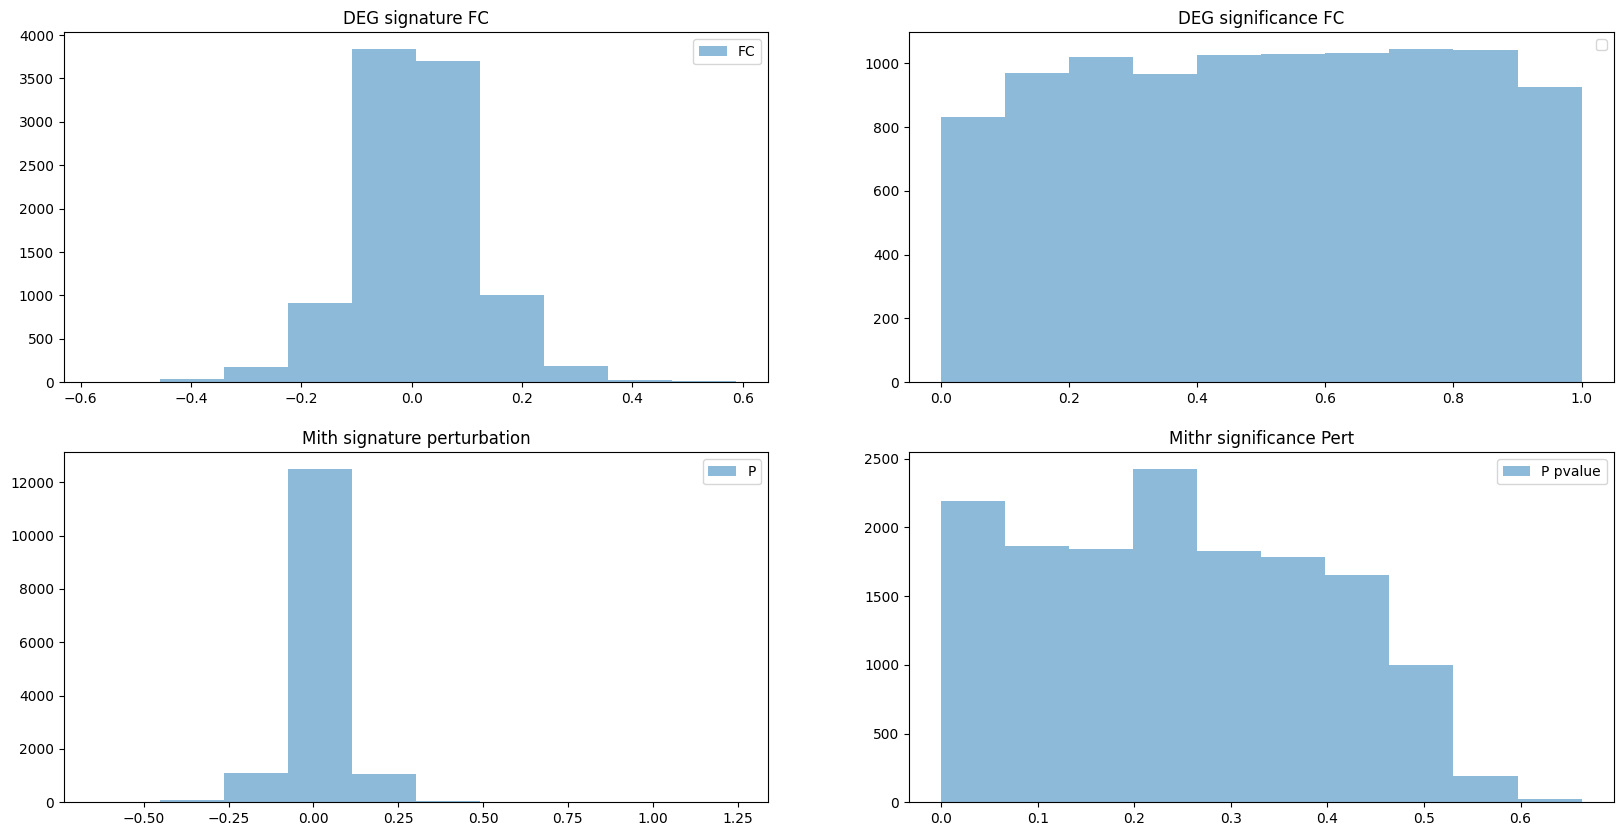

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(ex_drug_DEG_signature['DE_log2_FC_6h'], label='FC', alpha=0.5)
ax[1,0].hist(ex_drug_mith_signature['Perturbation_6h'], label='P', alpha=0.5)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(ex_drug_DEG_signature['p.value_6h'], label='FC pvalue', alpha=0.5)
ax[1,1].hist(ex_drug_mith_signature['p.value_6h'], label='P pvalue', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[1,0].legend()
ax[1,1].legend()



on common genes only:


/tmp/ipykernel_14059/700586472.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


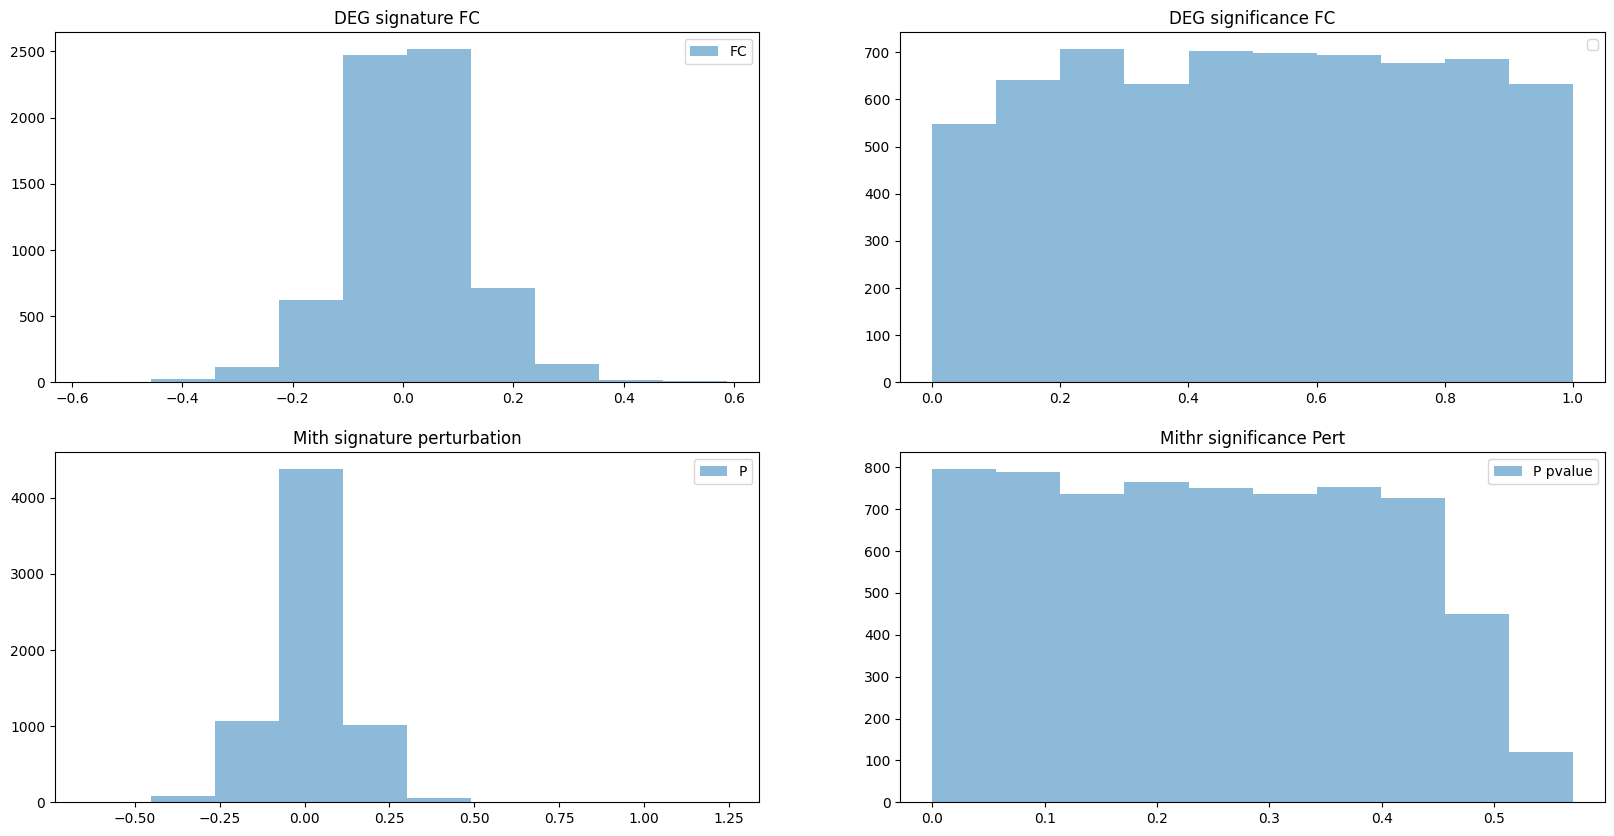

In [106]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(ex_drug_DEG_common['DE_log2_FC_6h'], label='FC', alpha=0.5)
ax[1,0].hist(ex_drug_mith_common['Perturbation_6h'], label='P', alpha=0.5)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(ex_drug_DEG_common['p.value_6h'], label='FC pvalue', alpha=0.5)
ax[1,1].hist(ex_drug_mith_common['p.value_6h'], label='P pvalue', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[1,0].legend()
ax[1,1].legend()


In [29]:
# kolomogorov smirnov tra i pvalue mith v deg? in questo caso si vede che DEG è abbastanza casuale perché i pvalue sono distribuiti unifioormnemente, e mit
#nmithril, non ostantenon abbia alcuna info sui pvalue, comunque riporta dei pvalue abbastanza brutti
# mithril capisce che i dati in input non sono buoni?
# mihtril come friltraggio?

Pearson cc: PearsonRResult(statistic=np.float64(-0.003789817785234465), pvalue=np.float64(0.7578045000491397)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.005615042103707931), pvalue=np.float64(0.6477575354231606))


(PearsonRResult(statistic=np.float64(-0.003789817785234465), pvalue=np.float64(0.7578045000491397)),
 SignificanceResult(statistic=np.float64(-0.005615042103707931), pvalue=np.float64(0.6477575354231606)))

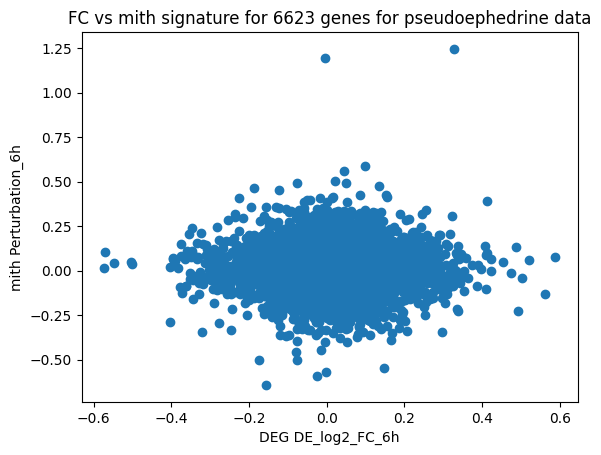

In [107]:
print_correlations(ex_drug_DEG_common,  ex_drug_mith_common,\
                       DEG_col='DE_log2_FC_6h', mith_col='Perturbation_6h',data_name=ex_drug)

In [45]:
ex_drug_mith_signature.columns

Index(['Gene Id', 'Gene Name', 'Perturbation_6h', 'p.value_6h',
       'adj.p.value_6h', 'drug', 't.value_like_statistic_6h',
       'Perturbation_24h', 'p.value_24h', 'adj.p.value_24h',
       't.value_like_statistic_24h', 'Perturbation_6h_24h', 'p.value_6h_24h',
       'adj.p.value_6h_24h', 't.value_like_statistic_6h_24h'],
      dtype='object')

Pearson cc: PearsonRResult(statistic=np.float64(-0.0076175552835904894), pvalue=np.float64(0.5353746786891885)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.0070539538317160875), pvalue=np.float64(0.5659932738995412))


(PearsonRResult(statistic=np.float64(-0.0076175552835904894), pvalue=np.float64(0.5353746786891885)),
 SignificanceResult(statistic=np.float64(-0.0070539538317160875), pvalue=np.float64(0.5659932738995412)))

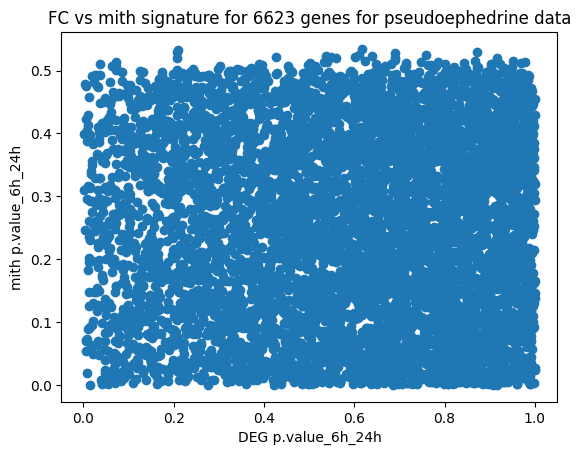

In [108]:
print_correlations(ex_drug_DEG_common,  ex_drug_mith_common,\
                       DEG_col='p.value_6h_24h', mith_col='p.value_6h_24h',data_name=ex_drug)

## is there a correlation between signs?
count the proportion of genes that have the same sign

In [110]:
ex_drug_mith_common['sign_6h']=ex_drug_mith_common.Perturbation_6h.apply(lambda x : np.where(x>0,1,0))
ex_drug_DEG_common['sign_6h']=ex_drug_DEG_common.DE_log2_FC_6h.apply(lambda x : np.where(x>0,1,0))

prop_agreeing_signs(ex_drug_DEG_common, ex_drug_mith_common, 'sign_6h')

/tmp/ipykernel_14059/2749347219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_drug_mith_common['sign_6h']=ex_drug_mith_common.Perturbation_6h.apply(lambda x : np.where(x>0,1,0))
/tmp/ipykernel_14059/2749347219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_drug_DEG_common['sign_6h']=ex_drug_DEG_common.DE_log2_FC_6h.apply(lambda x : np.where(x>0,1,0))


0.9628567114600635

Yes

In [92]:
# verifica correlazion fra segni, sembra ce ne sia poca.

In [ ]:
  # guarda quanti e aulli sono i kmirna e metavoliti e come variano e sono signifactivi

In [ ]:
# kolomogorov smirnov tra i pvalue mith v deg? in questo caso si vede che DEG è abbastanza casuale perché i pvalue sono distribuiti unifioormnemente, e mit
#nmithril, non ostantenon abbia alcuna info sui pvalue, comunque riporta dei pvalue abbastanza brutti
# mithril capisce che i dati in input non sono buoni?
# mihtril come friltraggio? e magari una matrice di kolmogorov smirnovs?

In [14]:
load_single_drug_signature('meclocycline', mith=False)

,gene,drug,DE_log2_FC_6h,std.error_6h,t.value_6h,p.value_6h,adj.p.value_6h,DE_log2_FC_24h,std.error_24h,t.value_24h,p.value_24h,adj.p.value_24h,DE_log2_FC_6h_24h,std.error_6h_24h,t.value_6h_24h,p.value_6h_24h,gene_id
0,A2M,meclocycline,-0.176416,0.206671,-0.853609,0.393321,0.742558,0.042981,0.205617,0.209034,0.834421,0.954622,-0.066157,0.145764,-0.453862,0.649928,3494
1,A4GALT,meclocycline,-0.006394,0.053997,-0.118409,0.905744,0.992159,0.037306,0.052635,0.708767,0.478469,0.852779,0.016014,0.037691,0.424883,0.670922,53947
2,AAAS,meclocycline,-0.031126,0.055905,-0.556772,0.577684,0.821923,0.028715,0.049349,0.581878,0.560649,0.810777,0.002507,0.036997,0.067766,0.945972,8086
3,AACS,meclocycline,-0.063720,0.104935,-0.607233,0.543696,0.814689,0.061160,0.099978,0.611738,0.540711,0.840006,0.001739,0.072384,0.024029,0.980830,65985
4,AADAC,meclocycline,0.097796,0.107575,0.909096,0.363300,0.801700,0.069582,0.103726,0.670821,0.502334,0.889524,0.083175,0.074669,1.113916,0.265315,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,ZWINT,meclocycline,0.083728,0.101428,0.825489,0.409094,0.733152,-0.064780,0.111083,-0.583168,0.559780,0.747766,0.016207,0.074902,0.216379,0.828693,11130
9888,ZXDC,meclocycline,0.024874,0.061366,0.405341,0.685227,0.919554,0.011807,0.059519,0.198380,0.842748,0.964937,0.018141,0.042724,0.424610,0.671121,79364
9889,ZYX,meclocycline,-0.121537,0.130473,-0.931510,0.351590,0.787229,-0.026279,0.121012,-0.217164,0.828081,0.961469,-0.070329,0.088725,-0.792670,0.427970,7791
9890,ZZEF1,meclocycline,0.018208,0.074769,0.243528,0.807597,0.945015,-0.033319,0.072113,-0.462045,0.644049,0.925884,-0.008487,0.051905,-0.163511,0.870116,23140


# Plot  correlations

In [28]:

# list of all Pearson and Spearman correlations

pearsons_magnitude_6h=[]
spearmans_magnitude_6h=[]

pearsons_pvalue_6h=[]
spearmans_pvalue_6h=[]


pearsons_magnitude_24h=[]
spearmans_magnitude_24h=[]

pearsons_pvalue_24h=[]
spearmans_pvalue_24h=[]


pearsons_magnitude_6h_24h=[]
spearmans_magnitude_6h_24h=[]

pearsons_pvalue_6h_24h=[]
spearmans_pvalue_6h_24h=[]


# slice common genes only, from first drug. Since the DEG drugs
# have the same genes, they will all have the same common genes with mith

ex_drug_DEG_signature=load_single_drug_signature('ibuprofen', mith=False)
ex_drug_mith_signature=load_single_drug_signature('ibuprofen', mith=True)



drug_DEG_common, drug_mith_common = compare_deg_and_mith_genes(ex_drug_DEG_signature, ex_drug_mith_signature)  

drug_DEG_common.sort_values(by='gene_id', inplace=True)
drug_mith_common.sort_values(by='gene_id', inplace=True)
drug_DEG_common_index=drug_DEG_common.index
drug_mith_common_index=drug_mith_common.index


drugs_list=get_drugs_list()




    
for drug in drugs_list:
    
    print(drug)
    drug_DEG_common=load_single_drug_signature(drug,mith=False).iloc[drug_DEG_common_index]
    
    drug_mith_common=load_single_drug_signature(drug,mith=True).iloc[drug_mith_common_index]

    
    # calculating correlation coefficients with 6h signatures
    drug_pearson_magnitude, drug_spearman_magnitude = print_correlations(drug_DEG_common, drug_mith_common,\
                                                     DEG_col='DE_log2_FC_6h', mith_col='Perturbation_6h',data_name=drug,\
                                                     scatter=False)
    pearsons_magnitude_6h.append(drug_pearson_magnitude[0])
    spearmans_magnitude_6h.append(drug_spearman_magnitude[0])


    drug_pearson_pval, drug_spearman_pval = print_correlations(drug_DEG_common, drug_mith_common,\
                                                     DEG_col='p.value_6h', mith_col='p.value_6h',data_name=drug,\
                                                     scatter=False)
    pearsons_pvalue_6h.append(drug_pearson_pval[0])
    spearmans_pvalue_6h.append(drug_spearman_pval[0])


    # calculating correlation coefficients with 24h signatures
    drug_pearson_magnitude, drug_spearman_magnitude = print_correlations(drug_DEG_common, drug_mith_common,\
                                                     DEG_col='DE_log2_FC_24h', mith_col='Perturbation_24h',data_name=drug,\
                                                     scatter=False)
    pearsons_magnitude_24h.append(drug_pearson_magnitude[0])
    spearmans_magnitude_24h.append(drug_spearman_magnitude[0])

    drug_pearson_pval, drug_spearman_pval = print_correlations(drug_DEG_common, drug_mith_common,\
                                                     DEG_col='p.value_24h', mith_col='p.value_24h',data_name=drug,\
                                                     scatter=False)
    pearsons_pvalue_24h.append(drug_pearson_pval[0])
    spearmans_pvalue_24h.append(drug_spearman_pval[0])

    
    # calculating correlation coefficients with 6h_24h signatures
    drug_pearson_magnitude, drug_spearman_magnitude = print_correlations(drug_DEG_common, drug_mith_common,\
                                                     DEG_col='DE_log2_FC_6h_24h', mith_col='Perturbation_6h_24h',data_name=drug,\
                                                     scatter=False)
    pearsons_magnitude_6h_24h.append(drug_pearson_magnitude[0])
    spearmans_magnitude_6h_24h.append(drug_spearman_magnitude[0])

    drug_pearson_pval, drug_spearman_pval = print_correlations(drug_DEG_common, drug_mith_common,\
                                                     DEG_col='p.value_6h_24h', mith_col='p.value_6h_24h',data_name=drug,\
                                                     scatter=False)
    pearsons_pvalue_6h_24h.append(drug_pearson_pval[0])
    spearmans_pvalue_6h_24h.append(drug_spearman_pval[0])


correlations_dataframe=pd.DataFrame(index=drugs_list)
correlations_dataframe['pearsons_magnitude_6h']=pearsons_magnitude_6h
correlations_dataframe['pearsons_magnitude_24h']=pearsons_magnitude_24h
correlations_dataframe['pearsons_magnitude_6h_24h']=pearsons_magnitude_6h_24h

correlations_dataframe['spearmans_magnitude_6h']=spearmans_magnitude_6h
correlations_dataframe['spearmans_magnitude_24h']=spearmans_magnitude_24h
correlations_dataframe['spearmans_magnitude_6h_24h']=spearmans_magnitude_6h_24h

correlations_dataframe['pearsons_pvalue_6h']=pearsons_pvalue_6h
correlations_dataframe['pearsons_pvalue_24h']=pearsons_pvalue_24h
correlations_dataframe['pearsons_pvalue_6h_24h']=pearsons_pvalue_6h_24h

correlations_dataframe['spearmans_pvalue_6h']=spearmans_pvalue_6h
correlations_dataframe['spearmans_pvalue_24h']=spearmans_pvalue_24h
correlations_dataframe['spearmans_pvalue_6h_24h']=spearmans_pvalue_6h_24h



missing genes from mithril 3269
addional_mith_items 8189
genes in common 6623
riprova: common genes+ additional mithril items == len(mithril_gene)? True
riprova: common genes+ missing mithril items == len(DEG_genees)? True
1,2,3,4,5,6-hexabromocyclohexane
4-carboxy-3-hydroxyphenylglycine-(RS)
7,4'-dihydroxyflavone
RHO-kinase-inhibitor-III[rockout]


/tmp/ipykernel_23852/1206576316.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_DEG_common.sort_values(by='gene_id', inplace=True)
/tmp/ipykernel_23852/1206576316.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_mith_common.sort_values(by='gene_id', inplace=True)


amitriptyline
hydrastine-(1r,-9s)
ibuprofen
ibuprofen-(S)
morphothebaine
oligomycin-a
pseudoephedrine
umbelliferone
zuclopenthixol


In [29]:
for correlation in correlations_dataframe.columns:
    print(correlations_dataframe[correlation].sort_values(ascending=False))

umbelliferone                            0.957306
morphothebaine                           0.955040
1,2,3,4,5,6-hexabromocyclohexane         0.952789
amitriptyline                            0.949584
ibuprofen                                0.949122
hydrastine-(1r,-9s)                      0.948550
RHO-kinase-inhibitor-III[rockout]        0.947822
7,4'-dihydroxyflavone                    0.946910
oligomycin-a                             0.941766
ibuprofen-(S)                            0.936091
4-carboxy-3-hydroxyphenylglycine-(RS)    0.933976
zuclopenthixol                           0.932654
pseudoephedrine                          0.931356
Name: pearsons_magnitude_6h, dtype: float64
pseudoephedrine                          0.956816
ibuprofen                                0.953710
RHO-kinase-inhibitor-III[rockout]        0.952879
umbelliferone                            0.950995
1,2,3,4,5,6-hexabromocyclohexane         0.948170
oligomycin-a                             0.946695
4-carb

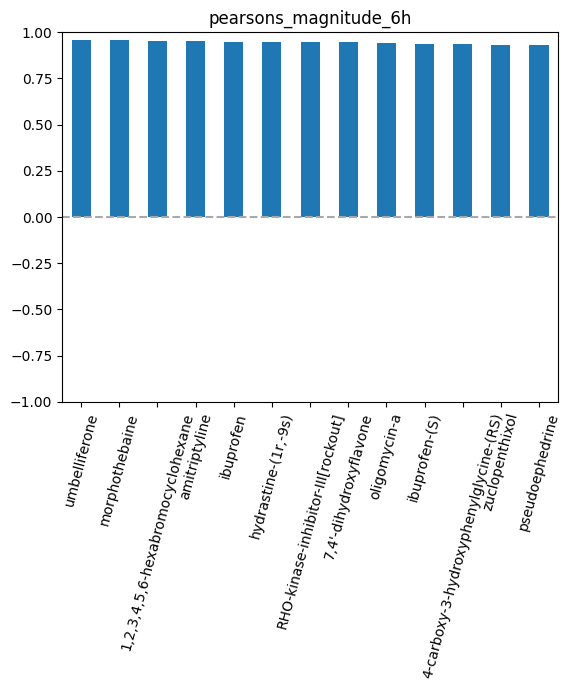

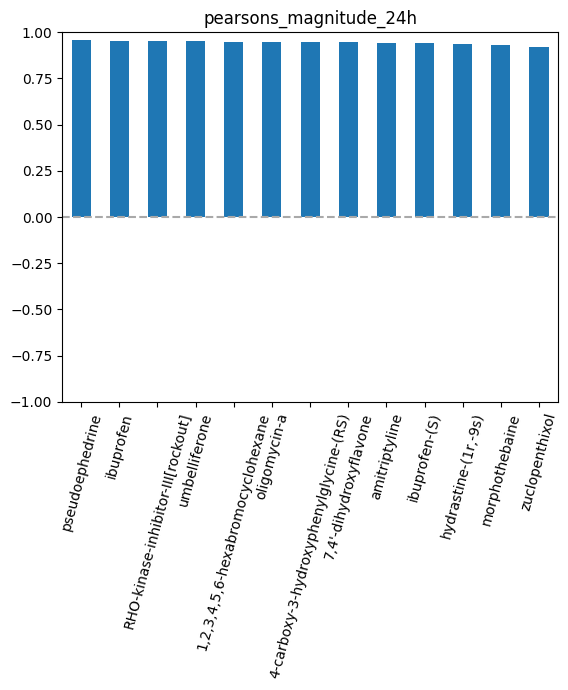

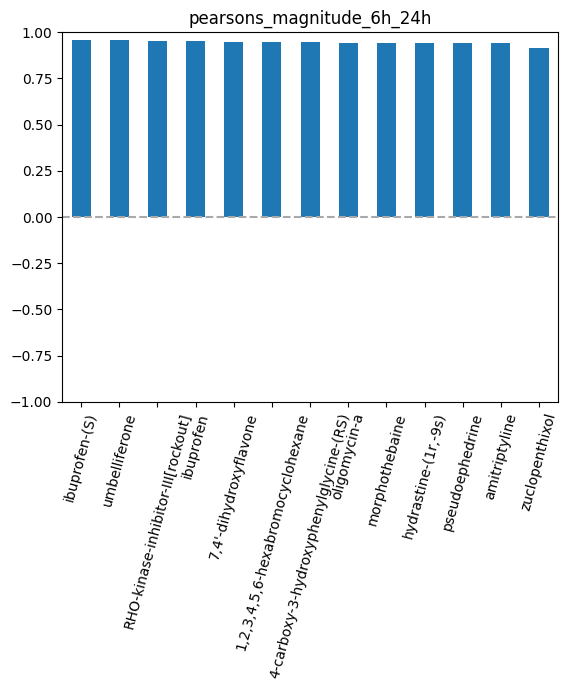

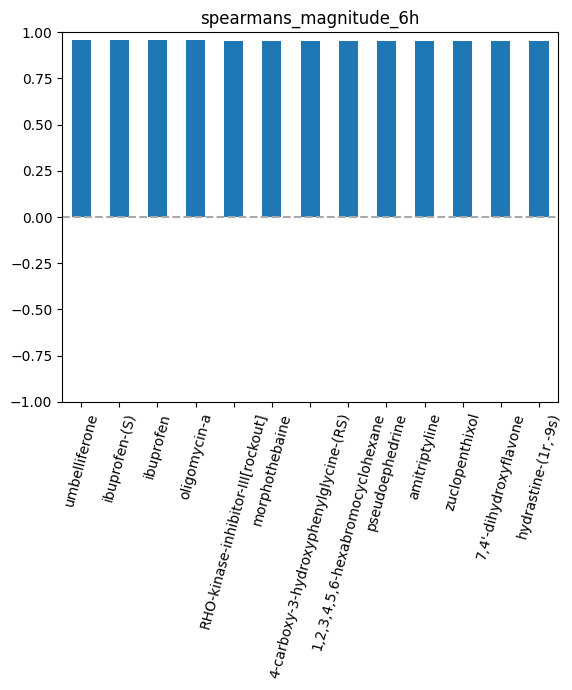

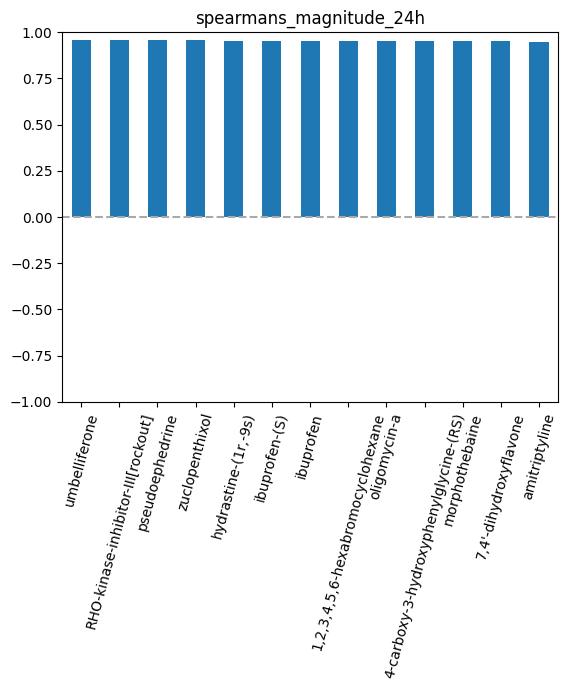

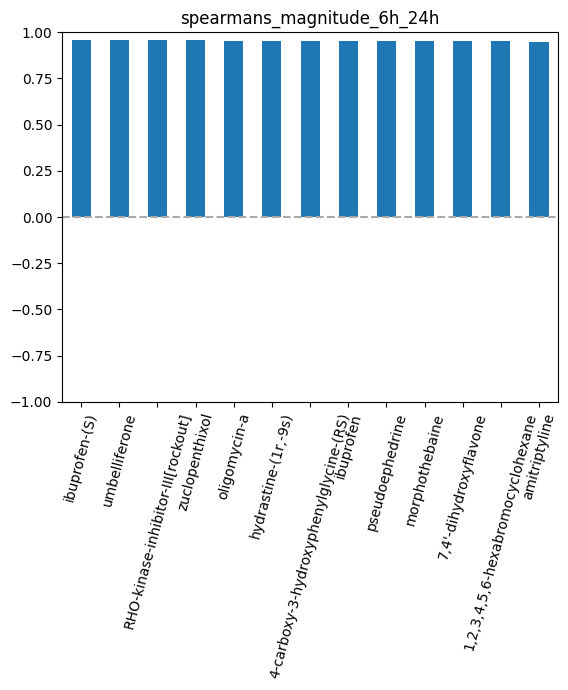

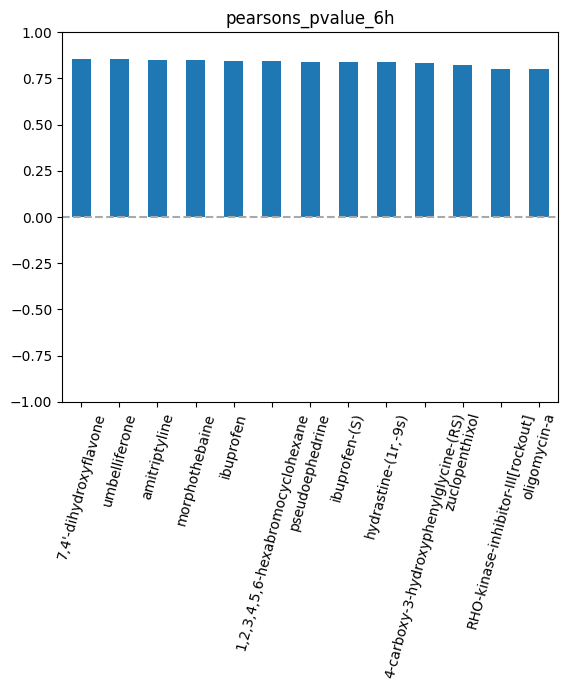

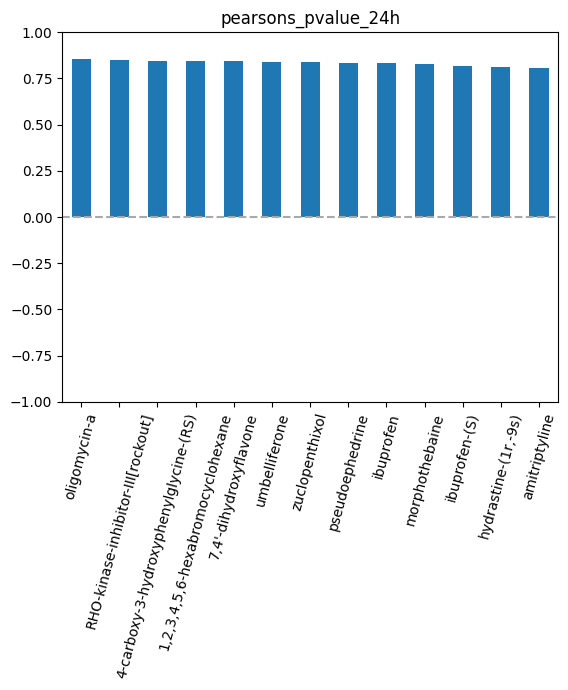

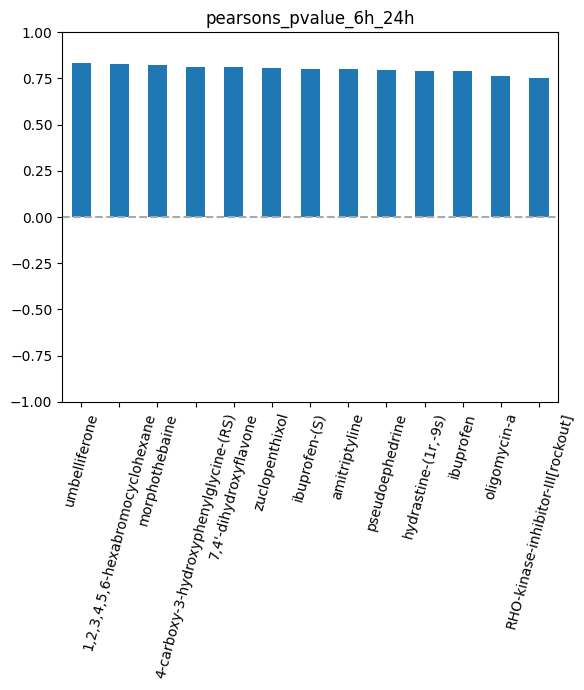

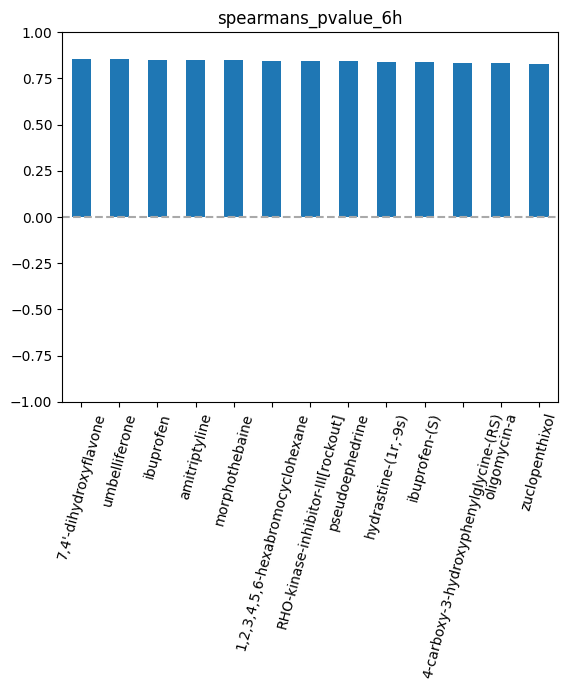

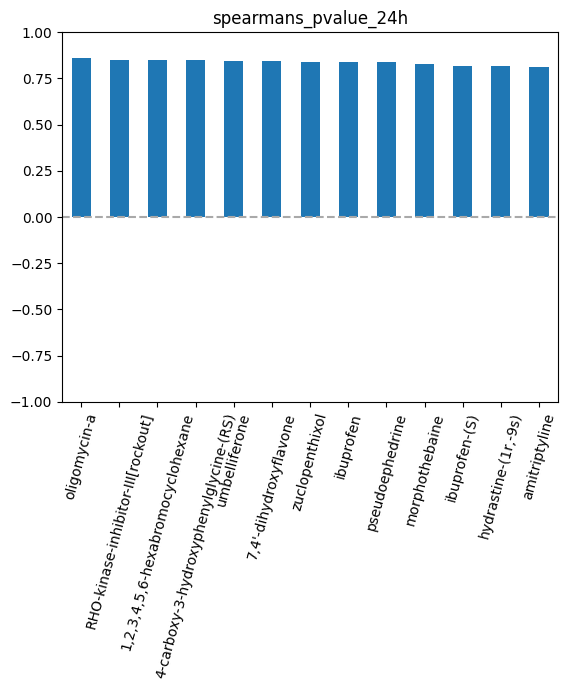

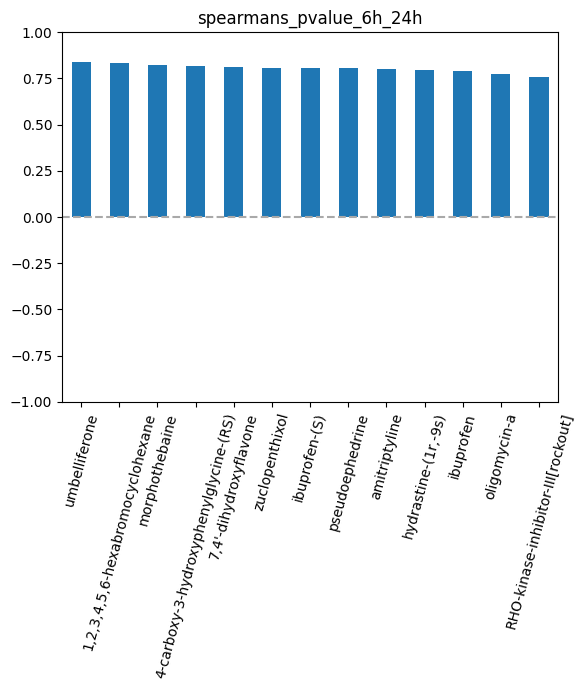

In [30]:
def plot_correlation(correlations_dataframe, correlation):
    plt.figure()
    correlations_dataframe[correlation].sort_values(ascending=False).plot(kind='bar')
    plt.xticks(rotation=75)
    plt.ylim(-1,1)
    plt.axhline(0, color='darkgrey', linestyle='--')
    plt.title(correlation)

for correlation in correlations_dataframe.columns:
    plot_correlation(correlations_dataframe, correlation)



# Connectivity scores

# Data exploration and comparison of connectivity score for disease als_NYGC, for all genes, for DEG data, with joined pipeline

# Pval based cscores

In [127]:
DEG_cs_data=pd.read_csv(CS_OUT+'DEG_connectivity_score.tsv', sep='\t')
DEG_cs_data.sort_values(by='connectivity_score')

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
9010,als_NYGC,solifenacin,24h,-1.998742,0.000,-0.163644,1.480435e-51,-0.185760,3.651169e-66,-0.164065
7834,als_NYGC,met-leu-phe,24h,-1.997699,0.000,-0.097788,2.531388e-19,-0.119298,4.914963e-28,-0.098474
1594,als_NYGC,BRD-K35568648,24h,-1.996568,0.001,0.020008,6.655490e-02,0.023617,3.033709e-02,0.019587
5849,als_NYGC,austricine,6h_24h,-1.995918,0.001,-0.117680,2.553610e-27,-0.135991,5.321795e-36,-0.118428
6716,als_NYGC,doramapimod,6h_24h,-1.995781,0.000,-0.060528,2.779992e-08,-0.069470,1.803161e-10,-0.061310
...,...,...,...,...,...,...,...,...,...,...
9377,als_NYGC,tribenoside,6h_24h,1.996468,0.000,-0.098848,1.034278e-19,-0.105657,2.613458e-22,-0.099769
2282,als_NYGC,BRD-K64024097,6h_24h,1.996495,0.001,0.045743,2.714416e-05,0.048697,7.912128e-06,0.046754
939,als_NYGC,BRD-K06623064,6h,1.996900,0.000,-0.031734,3.610415e-03,-0.039652,2.758627e-04,-0.031896
4623,als_NYGC,PP-2,6h,1.996900,0.000,-0.184321,3.735147e-65,-0.197642,7.972404e-75,-0.184800


In [25]:
DEG_cs_data[DEG_cs_data['drug']=='TG-100115']

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
5274,als_NYGC,TG-100115,6h,-0.026281,0.481,0.295964,1.310237e-169,0.320233,8.211135e-200,0.294330
5275,als_NYGC,TG-100115,24h,-1.969141,0.324,-0.233382,2.126610e-104,-0.257986,6.197870e-128,-0.233023
5276,als_NYGC,TG-100115,6h_24h,-1.965821,0.395,0.041052,1.662141e-04,0.037381,6.068465e-04,0.042433


In [128]:
mith_cs_data=pd.read_csv(CS_OUT+'mith_connectivity_score.tsv', sep='\t')
mith_cs_data.sort_values(by='cs_p_value').head(20)

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
7262,als_NYGC,haloperidol,6h_24h,1.996574,0.000,-0.066426,5.843139e-16,-0.075433,3.824977e-20,-0.069407
3104,als_NYGC,BRD-K98004941,6h_24h,1.995211,0.000,-0.048853,2.703055e-09,-0.056139,8.077457e-12,-0.047038
3269,als_NYGC,CGP-53353,6h_24h,-1.996415,0.000,-0.160542,4.324709e-86,-0.172600,2.075413e-99,-0.163929
1109,als_NYGC,BRD-K13665914,6h_24h,1.996464,0.000,-0.162061,1.031734e-87,-0.166335,2.313454e-92,-0.164939
4036,als_NYGC,L-655240,24h,-1.995251,0.000,-0.083073,4.190014e-24,-0.060902,1.186633e-13,-0.085900
7422,als_NYGC,imiquimod,6h,1.995432,0.001,0.027061,9.885586e-04,0.063512,1.019485e-14,0.025750
1041,als_NYGC,BRD-K10609180,6h,-1.994459,0.001,0.026905,1.057412e-03,0.056855,4.374480e-12,0.026555
4161,als_NYGC,MBCQ,6h,1.994592,0.001,0.062167,3.656339e-14,0.097998,6.141039e-33,0.063288
1564,als_NYGC,BRD-K33392208,24h,-1.996560,0.001,0.067411,2.159620e-16,0.080112,1.593360e-22,0.070126
5948,als_NYGC,betamethasone-acetate,6h_24h,-1.995402,0.001,-0.124989,1.205530e-52,-0.114935,9.730993e-45,-0.128643


# Plot cs

(3222, 10) (3222, 10)


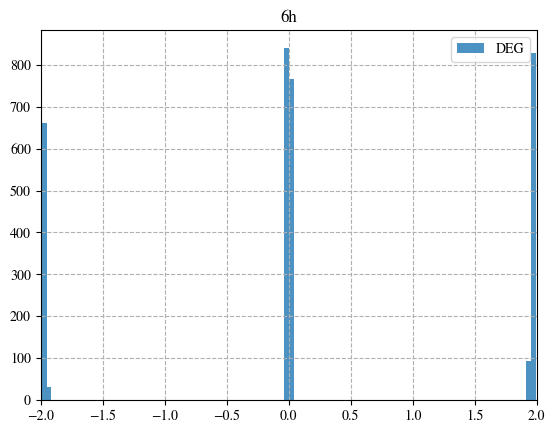

(3222, 10) (3222, 10)


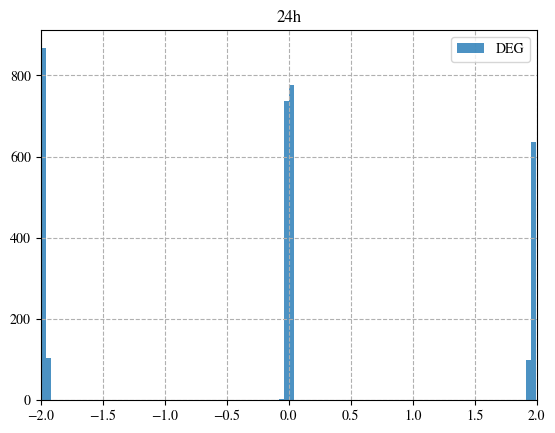

(3222, 10) (3222, 10)


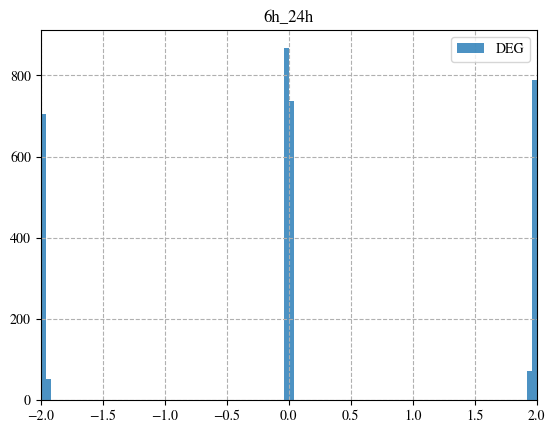

In [82]:
pert_times=['6h','24h','6h_24h'] 
for pert_time in pert_times:
    plt.hist(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time]['connectivity_score'], label='DEG', alpha=0.8, bins=100)
    print(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time].shape, mith_cs_data[mith_cs_data.perturbation_time==pert_time].shape)
   # plt.hist(mith_cs_data[mith_cs_data.perturbation_time==pert_time]['connectivity_score'], label='mith', alpha=0.5, bins=100)
    
    plt.grid(linestyle='--')
    plt.xlim(-2,2)
    plt.title(pert_time)
    plt.legend()
    plt.show()

(3222, 10)
(3222, 10)


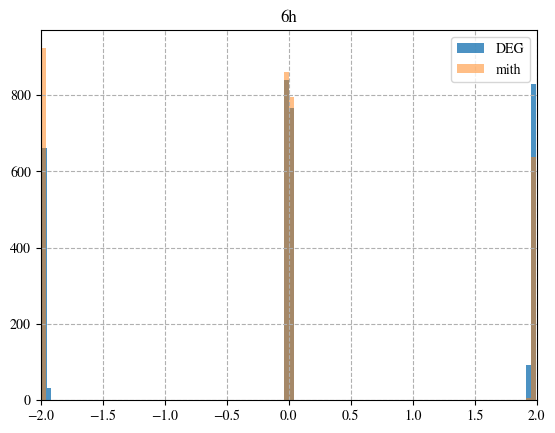

(3222, 10)
(3222, 10)


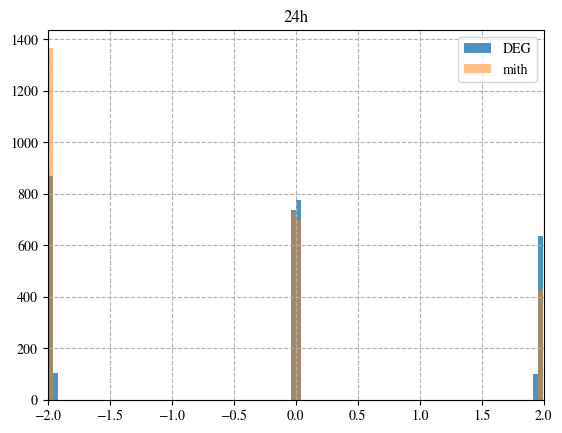

(3222, 10)
(3222, 10)


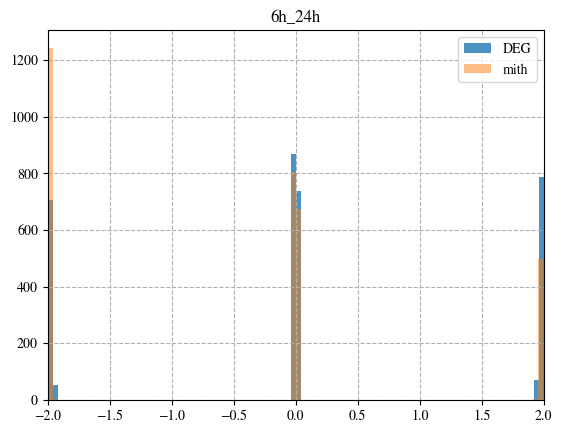

In [83]:
plot_hist(DEG_cs_data, mith_cs_data)

Are there values between [0.5,1.5] and [-1.5,-0.5]?

In [84]:
DEG_cs_data['connectivity_score'][((DEG_cs_data['connectivity_score']<=1.5) & (DEG_cs_data['connectivity_score']>=0.5))\
|((DEG_cs_data['connectivity_score']>=-1.5) & (DEG_cs_data['connectivity_score']<=-0.5))]

Series([], Name: connectivity_score, dtype: float64)

In [85]:
mith_cs_data['connectivity_score'][((mith_cs_data['connectivity_score']<=1.5) & (mith_cs_data['connectivity_score']>=0.5))\
|((mith_cs_data['connectivity_score']>=-1.5) & (mith_cs_data['connectivity_score']<=-0.5))]

Series([], Name: connectivity_score, dtype: float64)

No, there are not.

# Magnitude ranked cs

In [129]:
DEG_cs_data_mg=pd.read_csv(CS_OUT+'DEG_connectivity_score_magnitude2.tsv', sep='\t')
DEG_cs_data_mg

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
0,als_NYGC,"1,2,3,4,5,6-hexabromocyclohexane",6h,0.005250,0.779,-0.004544,6.769326e-01,-0.017666,1.052551e-01,-0.004990
1,als_NYGC,"1,2,3,4,5,6-hexabromocyclohexane",24h,-0.004566,0.856,0.046878,1.704453e-05,0.043724,6.050176e-05,0.047350
2,als_NYGC,"1,2,3,4,5,6-hexabromocyclohexane",6h_24h,-0.010128,0.648,0.027785,1.083401e-02,0.015614,1.522270e-01,0.027792
3,als_NYGC,"1,2-dichlorobenzene",6h,-1.961076,0.457,0.021116,5.283304e-02,0.027788,1.082641e-02,0.021737
4,als_NYGC,"1,2-dichlorobenzene",24h,-0.014366,0.586,-0.009696,3.739779e-01,-0.002446,8.225475e-01,-0.008945
...,...,...,...,...,...,...,...,...,...,...
9661,als_NYGC,zoxazolamine,24h,-0.009124,0.698,0.009187,3.996172e-01,0.004212,6.993541e-01,0.009477
9662,als_NYGC,zoxazolamine,6h_24h,-0.001735,0.933,-0.016579,1.284687e-01,-0.043064,7.808078e-05,-0.017571
9663,als_NYGC,zuclopenthixol,6h,1.981373,0.111,-0.108756,1.506078e-23,-0.147004,7.708529e-42,-0.109589
9664,als_NYGC,zuclopenthixol,24h,0.004290,0.837,-0.160384,1.441997e-49,-0.170712,5.174643e-56,-0.160972


In [130]:
mith_cs_data_mg=pd.read_csv(CS_OUT+'mith_connectivity_score_magnitude.tsv', sep='\t')
mith_cs_data_mg

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
0,als_NYGC,"1,2,3,4,5,6-hexabromocyclohexane",6h,1.987834,0.060,0.011321,1.682722e-01,-0.000159,9.845272e-01,0.011256
1,als_NYGC,"1,2,3,4,5,6-hexabromocyclohexane",24h,0.001848,0.908,0.060307,2.047089e-13,0.047106,9.711171e-09,0.062049
2,als_NYGC,"1,2,3,4,5,6-hexabromocyclohexane",6h_24h,-1.986513,0.090,0.046583,1.412184e-08,0.036423,9.253687e-06,0.047705
3,als_NYGC,"1,2-dichlorobenzene",6h,-0.005299,0.753,0.039566,1.458110e-06,0.026212,1.420585e-03,0.040420
4,als_NYGC,"1,2-dichlorobenzene",24h,-1.983266,0.181,0.092527,1.571295e-29,0.066597,4.917786e-16,0.093415
...,...,...,...,...,...,...,...,...,...,...
9661,als_NYGC,zoxazolamine,24h,-1.985024,0.119,-0.019062,2.034398e-02,0.014268,8.249225e-02,-0.018462
9662,als_NYGC,zoxazolamine,6h_24h,-1.984906,0.121,-0.066495,5.450198e-16,-0.065552,1.394835e-15,-0.068823
9663,als_NYGC,zuclopenthixol,6h,-1.977434,0.316,-0.121937,3.570794e-50,-0.148613,6.613508e-74,-0.124386
9664,als_NYGC,zuclopenthixol,24h,-1.959980,0.485,-0.163304,4.733499e-89,-0.162095,9.486296e-88,-0.167116


# Plot magnitude ranked cs

(3222, 10)
(3222, 10)


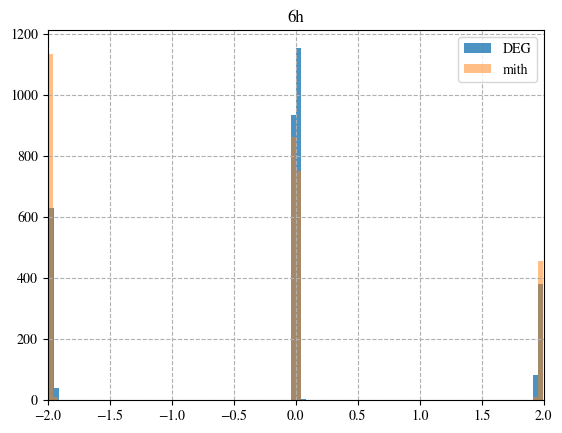

(3222, 10)
(3222, 10)


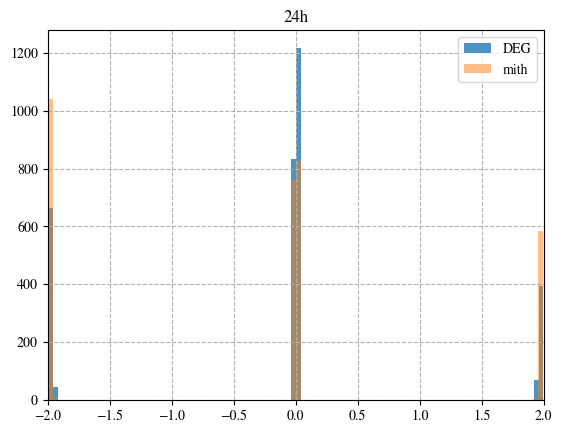

(3222, 10)
(3222, 10)


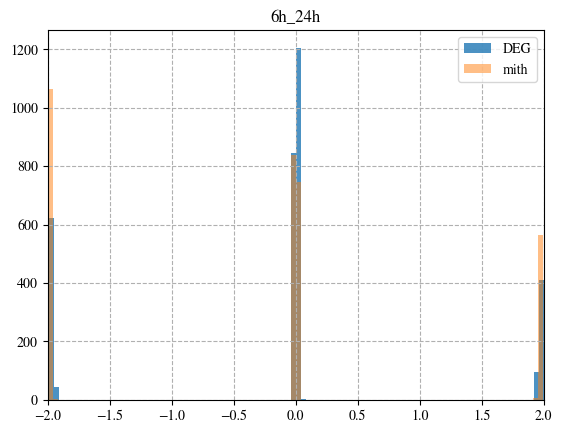

In [88]:
pert_times=['6h','24h','6h_24h'] 

plot_hist(DEG_cs_data_mg, mith_cs_data_mg)


# Correlation between significance based vs magnitude based

In [91]:
print(stats.spearmanr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], DEG_cs_data_mg.sort_values(by='drug')['connectivity_score']),\
      stats.pearsonr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], DEG_cs_data_mg.sort_values(by='drug')['connectivity_score']),\
stats.spearmanr(mith_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data_mg.sort_values(by='drug')['connectivity_score']),\
stats.pearsonr(mith_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data_mg.sort_values(by='drug')['connectivity_score']))

SignificanceResult(statistic=0.12010623613643562, pvalue=2.1588049322783356e-32) PearsonRResult(statistic=0.06174867721807192, pvalue=1.233059488945601e-09) SignificanceResult(statistic=0.018774677149966546, pvalue=0.06492536301752766) PearsonRResult(statistic=0.010324258297886685, pvalue=0.31013744646162056)


# sort by other values

(3424, 10)
(3424, 10)


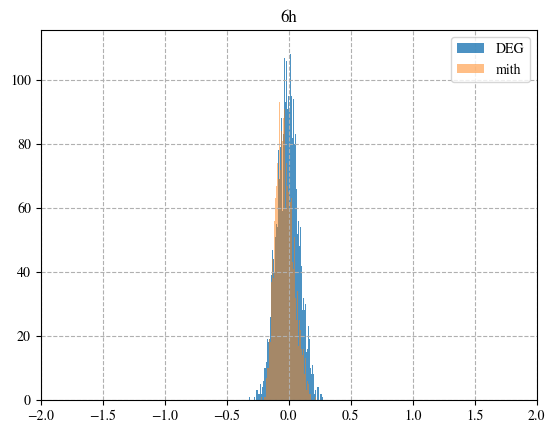

(3424, 10)
(3424, 10)


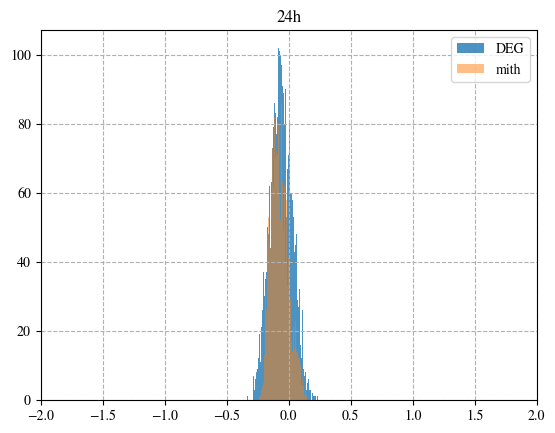

(3424, 10)
(3424, 10)


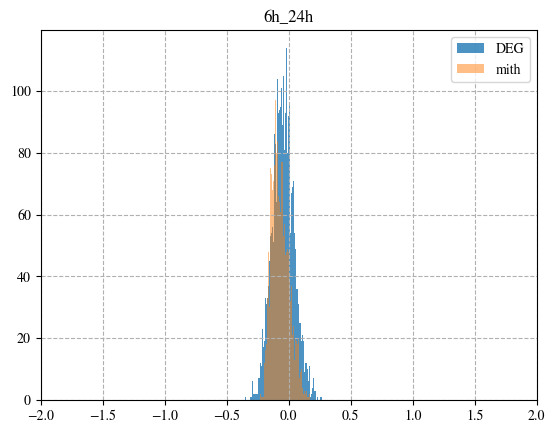

In [19]:
# SIGNIFICANCE RANKED
plot_hist(DEG_cs_data, mith_cs_data, 'pearson')

# Only focus on metanalysis
# plot Rankings

# DEG Plot drug rankings of 5 best and worst drugs

In [131]:
DEG_cs_data_24=DEG_cs_data[DEG_cs_data.perturbation_time=='24h']

In [132]:
mith_cs_data_24=mith_cs_data[mith_cs_data.perturbation_time=='24h']

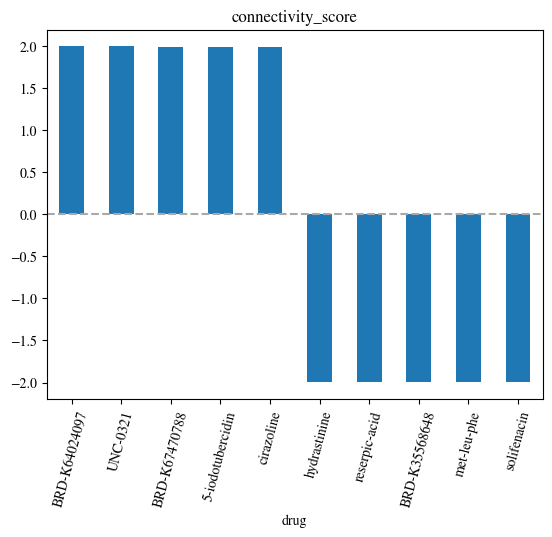

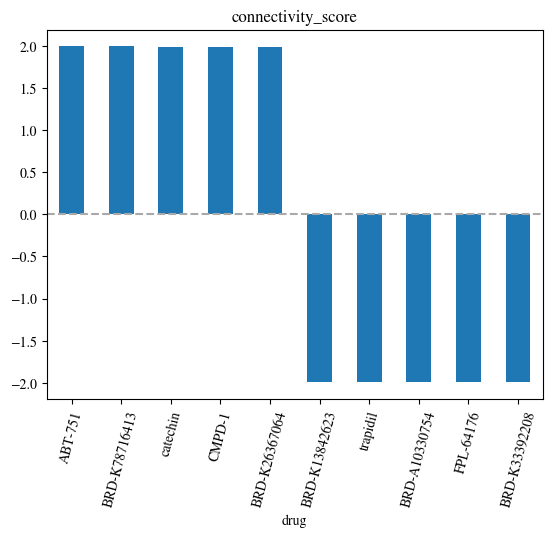

In [133]:
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'connectivity_score')
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'connectivity_score')

In [146]:
def print_most_and_least_connected(correlations_dataframe, correlation, n=10):
    '''
    correlations_dataframe is a dataframe with as index the label of interest (=drugs)
    '''

    most_correlated=correlations_dataframe[correlations_dataframe[correlation]>0]
    least_correlated=correlations_dataframe[correlations_dataframe[correlation]<0]
    print('\n'+correlation+' positive\n',most_correlated[correlation].sort_values(ascending=False).head(n))
    print('\n'+correlation+' negative\n',least_correlated[correlation].sort_values(ascending=True).head(n))
    return
# Sort by c
print_most_and_least_connected(mith_cs_data_24.set_index('drug'), 'connectivity_score')


connectivity_score positive
 drug
ABT-751            1.995566
BRD-K78716413      1.995470
catechin           1.994784
CMPD-1             1.994290
BRD-K26367064      1.993972
fenobam            1.993794
VUF-5681           1.993636
mesulergine        1.993626
endecaphyllin-x    1.993622
BMS-191011         1.993264
Name: connectivity_score, dtype: float64

connectivity_score negative
 drug
BRD-K33392208     -1.996560
FPL-64176         -1.996434
BRD-A10330754     -1.995656
trapidil          -1.995542
BRD-K13842623     -1.995484
phenazopyridine   -1.995335
L-655240          -1.995251
ARG-CSC2-23       -1.995118
CCCP              -1.995079
GBR-12783         -1.994862
Name: connectivity_score, dtype: float64


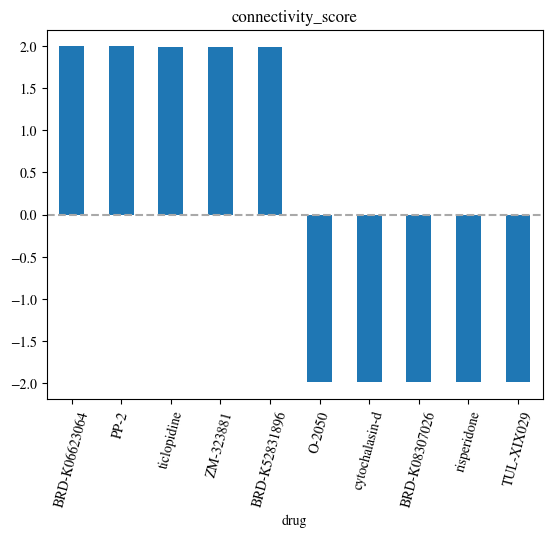

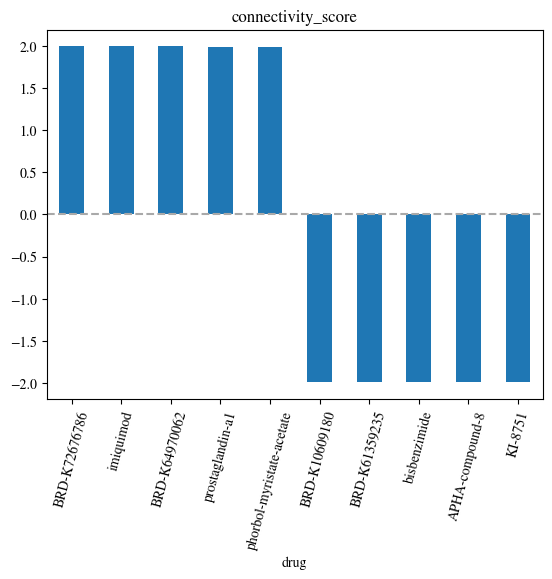

In [140]:
plot_10_most_correlated(DEG_cs_data[DEG_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score')
plot_10_most_correlated(mith_cs_data[mith_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score')

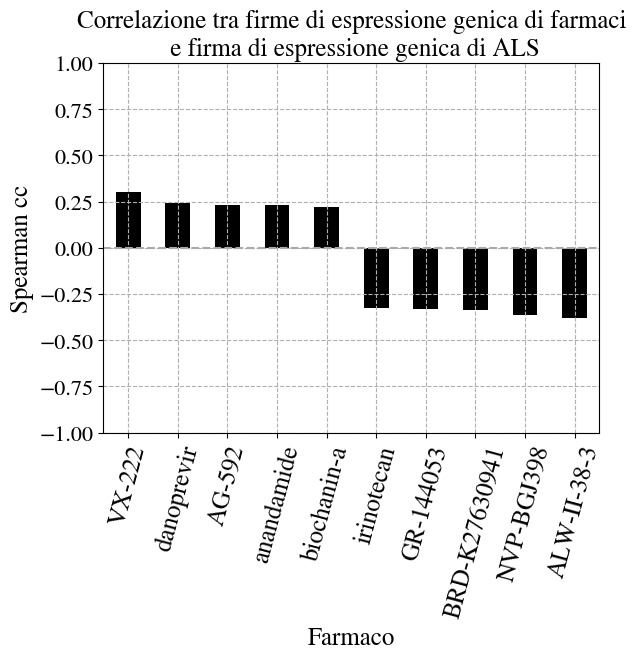

In [107]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

def nice_plot_10_most_correlated(correlations_dataframe, correlation, \
                                 imgname, xlabel, ylabel):
    plt.figure()
    most_and_least_correlated=pd.concat([correlations_dataframe[correlation].sort_values(ascending=False).head(5), correlations_dataframe[correlation].sort_values(ascending=False).tail(5)])
    most_and_least_correlated.plot(kind='bar', color='black')
    plt.xticks(rotation=75, fontsize=18)
    plt.yticks(fontsize=16)
    plt.ylim(-1,1)
    plt.grid(linestyle='--')
    plt.axhline(0, color='darkgrey', linestyle='--')
    plt.title('Correlazione tra firme di espressione genica di farmaci\n e firma di espressione genica di ALS', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.savefig(IMG_DIR+correlation+'.pdf')
    return
imgname='spearman_cc_esame'
xlabel='Farmaco'
ylabel='Spearman cc'
nice_plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'spearman', imgname, xlabel, ylabel)


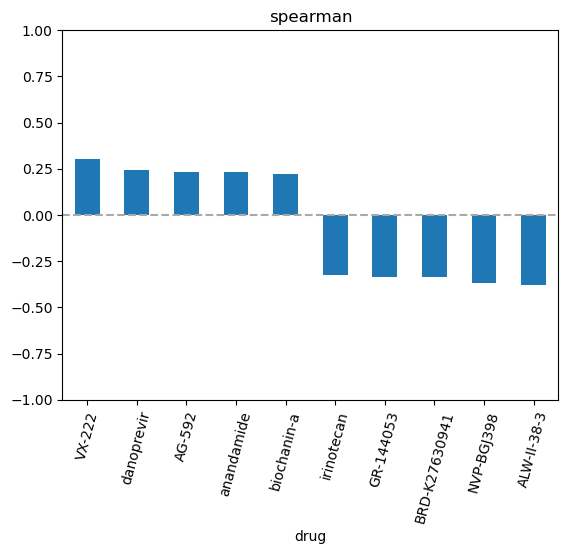

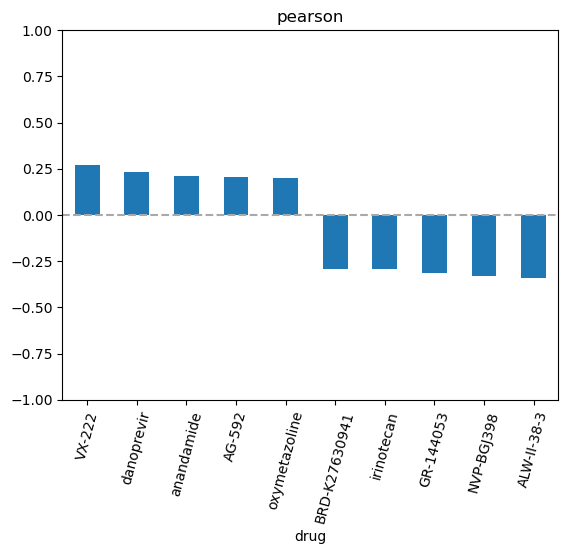

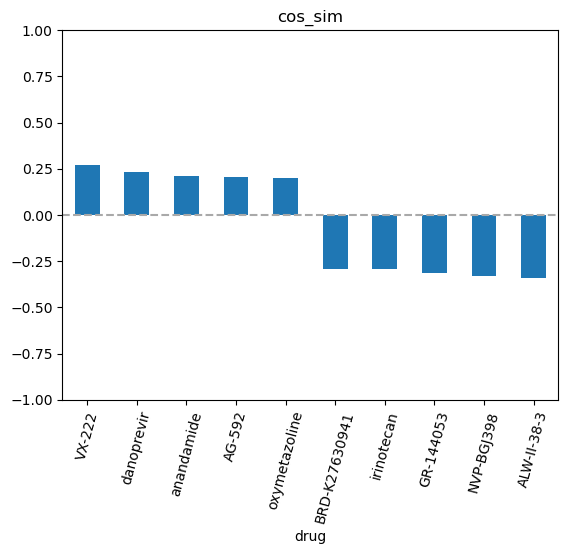

In [77]:
# spearman
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'spearman')
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'pearson')
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'cos_sim')

# mith Plot drug rankings of 5 best and worst drugs

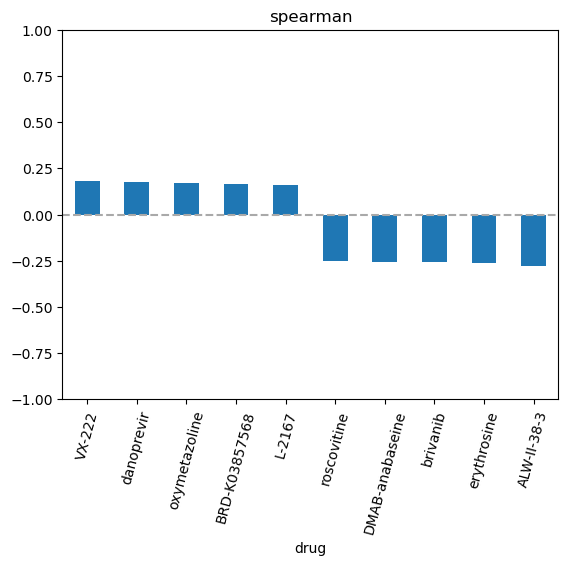

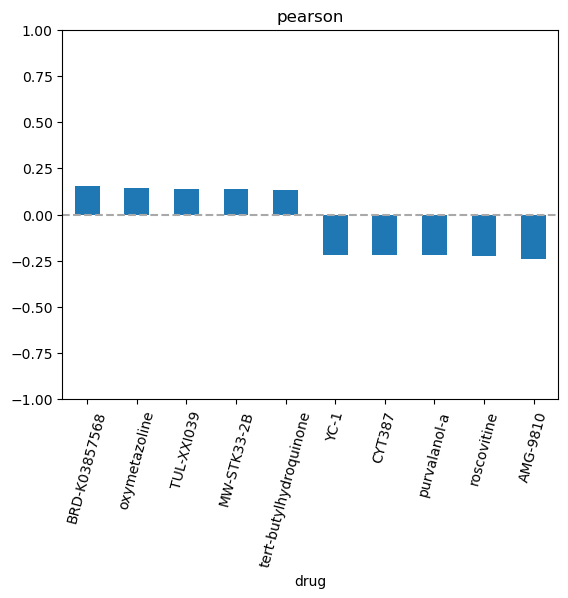

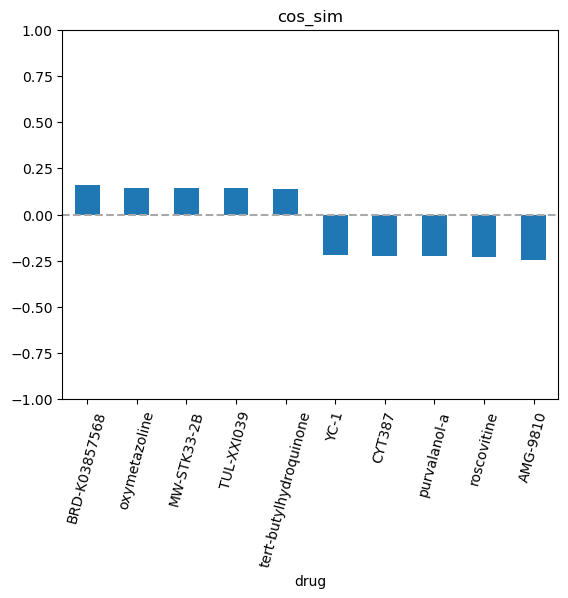

In [36]:
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'spearman')
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'pearson')
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'cos_sim')



In [70]:
mith_cs_data.sort_values(by='connectivity_score').head(10)

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
3269,als_NYGC,CGP-53353,6h_24h,-1.996397,0.000,-0.160542,4.324709e-86,-0.172600,2.075413e-99,-0.163929
977,als_NYGC,BRD-K07530279,6h_24h,-1.995706,0.004,-0.179420,2.152113e-107,-0.217760,1.756458e-158,-0.182585
5948,als_NYGC,betamethasone-acetate,6h_24h,-1.995385,0.000,-0.124989,1.205530e-52,-0.114935,9.730993e-45,-0.128643
1460,als_NYGC,BRD-K28789065,6h_24h,-1.995331,0.000,-0.143243,9.684236e-69,-0.109777,6.062209e-41,-0.145557
5780,als_NYGC,antimycin-a,6h_24h,-1.995264,0.000,-0.173344,2.894030e-100,-0.154977,2.767803e-80,-0.176270
5063,als_NYGC,SNS-314,6h_24h,-1.995196,0.000,-0.133715,4.655787e-60,-0.116883,3.225341e-46,-0.137370
8228,als_NYGC,olvanil,6h_24h,-1.995129,0.000,-0.162948,1.146775e-88,-0.138281,3.846183e-64,-0.167177
8111,als_NYGC,niguldipine,6h_24h,-1.994980,0.000,-0.110167,3.177561e-41,-0.094219,1.455222e-30,-0.112370
1457,als_NYGC,BRD-K28774715,6h_24h,-1.994905,0.000,0.069101,3.789327e-17,0.067606,1.770520e-16,0.072336
7289,als_NYGC,hexylcaine,6h_24h,-1.994877,0.002,-0.124387,3.746839e-52,-0.102169,1.143783e-35,-0.127379


## SYnonym lists sneza senso di riluzole e edavarone che sono medicine usate in als

In [86]:
list_of_synonyms_of_edaravone=["edaravone",
"89-25-8",
"3-METHYL-1-PHENYL-2-PYRAZOLIN-5-ONE",
"Radicut",
"Norphenazone",
"1-Phenyl-3-methyl-5-pyrazolone",
"Developer Z",
"MCI-186",
"Methylphenylpyrazolone",
"C.I. Developer 1",
"Norantipyrine",
"Phenyl methyl pyrazolone",
"Phenylmethylpyrazolone",
"Radicava",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one",
"3-Methyl-1-phenyl-1H-pyrazol-5(4H)-one",
"1-Phenyl-3-methyl-5-oxo-2-pyrazoline",
"CI Developer 1",
"1-Phenyl-3-methylpyrazolone",
"3H-Pyrazol-3-one, 2,4-dihydro-5-methyl-2-phenyl-",
"1-Phenyl-3-methylpyrazolone-5",
"2-Pyrazolin-5-one, 3-methyl-1-phenyl-",
"3-Methyl-1-phenylpyrazol-5-one",
"5-methyl-2-phenyl-4H-pyrazol-3-one",
"Colorex pmp",
"Jarocol pmp",
"3-Methyl-1-phenyl-2-pyrazoline-5-one",
"NCI-C03952",
"5-Pyrazolone, 3-methyl-1-phenyl-",
"2,4-Dihydro-5-methyl-2-phenyl-3H-pyrazol-3-one",
"Edaravone (MCI-186)",
"NSC-2629",
"CCRIS 512",
"edaravona",
"NSC-26139",
"1-Fenyl-3-methyl-2-pyrazolin-5-on",
"CHEBI:31530",
"HSDB 4102",
"UNII-S798V6YJRP",
"EINECS 201-891-0",
"S798V6YJRP",
"MFCD00003138",
"BRN 0609575",
"DTXSID9021130",
"AI3-03557",
"3-methyl-1-phenyl-4,5-dihydro-1H-pyrazol-5-one",
"MLS000069602",
"3-METHYL-1-PHENYL-2-PYRAZOLIN-5-ONE (MCI-186)",
"DTXCID201130",
"EC 201-891-0",
"1-Phenyl-3-methyl-2-pyrazolin-5-one",
"NCGC00164015-01",
"SMR000059020",
"EDARAVONE (MART.)",
"EDARAVONE [MART.]",
"Edaravone [INN]",
"Monopyrazolone",
"WLN: T5NMV DHJ BR& E1",
"CAS-89-25-8",
"Radicut (TN)",
"PHENAZONE IMPURITY A (EP IMPURITY)",
"PHENAZONE IMPURITY A [EP IMPURITY]",
"3H-Pyrazol-3-one,4-dihydro-5-methyl-2-phenyl-",
"SR-01000000135",
"1-Fenyl-3-methyl-2-pyrazolin-5-on [Czech]",
"edaravonum",
"3-?Methyl-?1-?phenyl-?2-?pyrazolin-?5-?one(Edaravone)",
"MCI186",
"(Edaravone)",
"1 Phenyl 3 methyl 5 pyrazolone",
"Radicava (TN)",
"(MCI-186)",
"Edaravone (Standard)",
"3 Methyl 1 phenyl 2 pyrazolin 5 one",
"RADICAVA ORS",
"CDS1_000986",
"Spectrum_000267",
"Tocris-0786",
"EDARAVONE [JAN]",
"MCI-186; Edaravone",
"Edaravone [USAN:INN]",
"EDARAVONE [HSDB]",
"EDARAVONE [USAN]",
"Maybridge1_005738",
"Opera_ID_1057",
"Spectrum2_001574",
"Spectrum3_000971",
"Spectrum4_001091",
"Spectrum5_001217",
"NORPHENAZONE [MI]",
"M0687",
"EDARAVONE [WHO-DD]",
"N-DESMETHYLANTIPYRINE",
"SCHEMBL4704",
"BSPBio_001235",
"BSPBio_002601",
"KBioGR_000575",
"KBioGR_001502",
"KBioSS_000575",
"KBioSS_000747",
"AE-641/00371017",
"MLS001146878",
"MLS002415675",
"MLS006011753",
"DivK1c_001018",
"DivK1c_002026",
"SPECTRUM1503635",
"SPBio_001508",
"CHEMBL290916",
"1-pheny-3-methyl-5-pyrazolone",
"Edaravone (USAN/JP17/INN)",
"EDARAVONE [ORANGE BOOK]",
"BCBcMAP01_000127",
"GTPL11994",
"HMS503K17",
"HMS557M18",
"HY-B0099R",
"KBio1_001018",
"KBio2_000575",
"KBio2_000747",
"KBio2_003143",
"KBio2_003315",
"KBio2_005711",
"KBio2_005883",
"KBio3_001029",
"KBio3_001030",
"KBio3_001821",
"N07XX14",
"NSC2629",
"NINDS_001018",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one (Edaravone)",
"BCPP000246",
"Bio1_000438",
"Bio1_000927",
"Bio1_001416",
"Bio2_000448",
"Bio2_000928",
"HMS1362M17",
"HMS1792M17",
"HMS1990M17",
"HMS2234M19",
"HMS3266F04",
"HMS3403M17",
"HMS3411L05",
"HMS3654L15",
"HMS3675L05",
"HMS3884A11",
"Pharmakon1600-01503635",
"BCP26336",
"HY-B0099",
"NSC26139",
"Tox21_112077",
"Tox21_201747",
"Tox21_302819",
"BDBM50200541",
"CCG-39352",
"NSC758622",
"s1326",
"STK201315",
"1-Phenyl-3-methyl-2-pyrazolin-5-on",
"AKOS000313817",
"Tox21_112077_1",
"AC-4745",
"BCP9000635",
"CS-1832",
"DB12243",
"NSC-758622",
"SB19128",
"IDI1_001018",
"IDI1_002203",
"NCGC00018218-01",
"NCGC00018218-02",
"NCGC00018218-03",
"NCGC00018218-04",
"NCGC00018218-05",
"NCGC00018218-06",
"NCGC00018218-07",
"NCGC00018218-08",
"NCGC00018218-10",
"NCGC00018218-17",
"NCGC00022665-02",
"NCGC00022665-04",
"NCGC00022665-05",
"NCGC00022665-06",
"NCGC00256515-01",
"NCGC00259296-01",
"SBI-0051836.P002",
"1ST000657",
"DB-002517",
"NS00002708",
"SW148216-2",
"5-methyl-2-phenyl-2,4-dihydro-3-pyrazolone",
"EN300-16234",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, 99%",
"3-METHYL-1-PHENYL-2H-PYRAZOLIN-5-ONE",
"4E-901",
"5-methyl-2-phenyl-2,4-dihydro-pyrazol-3-one",
"D01552",
"D86209",
"1-PHENYL-3-METHYL-DELTA3-PYRAZOL-5-ONE",
"3-?Methyl-?1-?phenyl-?2-?pyrazolin-?5-?one",
"3-PYRAZOLIN-5-ONE, 3-METHYL-1-PHENYL-",
"AB00375776_14",
"AB00375776_15",
"2 4-Dihydro-5-methyl-2-phenyl-3H-pyrazol-3-one",
"2,4-dihydro-2-phenyl-5-methyl-3H-pyrazol-3-one",
"Q335099",
"SR-01000000135-2",
"SR-01000000135-3",
"SR-01000000135-5",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one #",
"BRD-K35458079-001-04-2",
"BRD-K35458079-001-12-5",
"BRD-K35458079-001-23-2",
"BRD-K35458079-001-27-3",
"BRD-K35458079-001-28-1",
"BRD-K35458079-001-29-9",
"BRD-K35458079-001-31-5",
"BRD-K35458079-001-33-1",
"Z50145861",
"F0391-0021",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, SAJ special grade",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, purum, >=98.0% (NT)",
"Phenazone impurity A, European Pharmacopoeia (EP) Reference Standard",
"InChI=1/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-2-4-6-9/h2-6H,7H2,1H"]
list_of_synonyms_of_riluzole=["riluzole",
"1744-22-5",
"Rilutek",
"2-Amino-6-(trifluoromethoxy)benzothiazole",
"6-(trifluoromethoxy)benzo[d]thiazol-2-amine",
"6-(trifluoromethoxy)-1,3-benzothiazol-2-amine",
"Riluzol",
"RP-54274",
"Riluzolum",
"2-amino-6-trifluoromethoxybenzothiazole",
"2-Benzothiazolamine, 6-(trifluoromethoxy)-",
"2-amino-6-(trifluoromethoxy)benzo[d]thiazole",
"Tiglutik",
"C8H5F3N2OS",
"PK-26124",
"RP 54274",
"Riluzol [INN-Spanish]",
"Riluzolum [INN-Latin]",
"2-Benzothiazolamine,6-(trifluoromethoxy)-",
"Amino-2 trifluoromethoxy-6 benzothiazole",
"UNII-7LJ087RS6F",
"NSC-753433",
"NSC-759823",
"EXSERVAN",
"7LJ087RS6F",
"MLS000069369",
"6-(trifluoromethoxy)-2-benzothiazolamine",
"6-Trifluoromethoxy-benzothiazol-2-ylamine",
"2-Amino-6-(trifluoromethoxy)-benzothiazole",
"BHV-0223",
"CHEMBL744",
"BENZOTHIAZOLE, 2-AMINO-6-TRIFLUOROMETHOXY-",
"SMR000058231",
"CHEBI:8863",
"DTXSID3045192",
"Riluzole [USAN:USP:INN:BAN]",
"Tiglutik (thickened oral suspension)",
"MFCD00210213",
"NSC 753433",
"NSC 759823",
"NCGC00015882-09",
"Riluzol (INN-Spanish)",
"Riluzolum (INN-Latin)",
"RILUZOLE (MART.)",
"RILUZOLE [MART.]",
"RILUZOLE (USP-RS)",
"RILUZOLE [USP-RS]",
"RILUZOLE (USP IMPURITY)",
"RILUZOLE [USP IMPURITY]",
"DTXCID1025192",
"RILUZOLE (USP MONOGRAPH)",
"RILUZOLE [USP MONOGRAPH]",
"Riluzole (USAN:USP:INN:BAN)",
"Rilutek (TN)",
"CAS-1744-22-5",
"Amino-2 trifluoromethoxy-6 benzothiazole [French]",
"Riluzole, solid",
"Riluzole?",
"BF-37",
"2-amino-6-(trifluoromethoxy)-1,3-benzothiazole",
"ALBB-006046",
"Riluzole (Rilutek)",
"Prestwick-03A08",
"Riluzole (Standard)",
"2 Amino 6 trifluoromethoxybenzothiazole",
"PK26124",
"TIGLUTIK KIT",
"Tocris-0768",
"Opera_ID_548",
"RILUZOLE [USAN]",
"Lopac-R-116",
"RILUZOLE [INN]",
"RILUZOLE [JAN]",
"RILUZOLE [MI]",
"Prestwick0_000167",
"Prestwick1_000167",
"Prestwick2_000167",
"Prestwick3_000167",
"Spectrum2_000550",
"Biomol-NT_000245",
"RILUZOLE [WHO-DD]",
"cid_5070",
"Riluzole (JAN/USP/INN)",
"RILUZOLE [EMA EPAR]",
"Lopac0_001064",
"SCHEMBL78905",
"BSPBio_000033",
"BIDD:GT0055",
"SPBio_000599",
"SPBio_001954",
"RILUZOLE [ORANGE BOOK]",
"BPBio1_000037",
"BPBio1_000837",
"GTPL2326",
"BDBM30705",
"HY-B0211R",
"N07XX02",
"Bio1_000416",
"Bio1_000905",
"Bio1_001394",
"HMS1773G08",
"HMS2089O19",
"HMS2094G07",
"HMS2233E14",
"HMS3263E10",
"HMS3371A09",
"HMS3657E13",
"Pharmakon1600-01505348",
"BCP02142",
"HY-B0211",
"Riluzole - CAS 1744-22-5",
"Tox21_110252",
"Tox21_501064",
"AC-730",
"BBL013272",
"CCG-39528",
"HB6093",
"NSC753433",
"NSC759823",
"s1614",
"STK503686",
"AKOS000265071",
"Tox21_110252_1",
"DB00740",
"KS-5231",
"LP01064",
"SDCCGSBI-0051034.P003",
"2-amino-6-trifluoromethoxy-benzothiazole",
"6-(trifluoromethoxy)benzothiazol-2-amine",
"6-trifluoromethoxy-2-amino-benzothiazole",
"NCGC00015882-01",
"NCGC00015882-02",
"NCGC00015882-03",
"NCGC00015882-04",
"NCGC00015882-05",
"NCGC00015882-06",
"NCGC00015882-07",
"NCGC00015882-08",
"NCGC00015882-10",
"NCGC00015882-11",
"NCGC00015882-12",
"NCGC00015882-13",
"NCGC00015882-15",
"NCGC00015882-28",
"NCGC00023141-02",
"NCGC00023141-04",
"NCGC00023141-05",
"NCGC00023141-06",
"NCGC00261749-01",
"6-(trifluoromethoxy)-2-aminobenzothiazole",
"6-trifluoromethoxybenzo[d]thiazol-2-amine",
"BR164340",
"SBI-0051034.P002",
"2-Amino-6-(Trifluoromethoxy) Benzothiazole",
"6-(Trifluoromethoxy)-2-amino-benzothiazole",
"DB-030335",
"A2423",
"EU-0101064",
"NS00005892",
"R1174",
"SW196805-4",
"EN300-23782",
"6-trifluoromethoxy-1,3-benzothiazol-2-ylamine",
"A13951",
"C07937",
"D00775",
"VU0239571-11",
"Q415744",
"SR-01000002997-3",
"BRD-K21283037-001-02-5",
"BRD-K21283037-001-20-7",
"BRD-K21283037-001-21-5",
"BRD-K21283037-003-03-9",
"BRD-K21283037-003-06-2",
"BRD-K21283037-003-11-2",
"F3282-0020",
"Z164707762",
"Riluzole, 6-(Trifluoromethoxy)-1,3-benzothiazol-2-amine",
"Riluzole, United States Pharmacopeia (USP) Reference Standard",
"2-Amino-6-(trifluoromethoxy)-1,3-benzothiazole;2-AMINO-6-(TRIFLUOROMETHOXY)BENZOTHIAZOLE",
"6-Trifluoromethoxy-2-aminobenzothiazole; 6-(Trifluoromethoxy)-1,3-benzothiazol-2-amine"]

# asd

In [87]:
for x in list_of_synonyms_of_riluzole:
    if x in  mith_cs_data.drug:
        print(x)

non c'è

# Drugs ranking by similarity measures significance

In [141]:
def print_10_most_and_least_significantly_corelated(correlations_dataframe, correlation, p_val_correlation, n=10):
    '''
    correlations_dataframe is a dataframe with as index the label of interest (=drugs)
    '''

    #still full data
    most_correlated=correlations_dataframe[correlations_dataframe[correlation]>0]
    least_correlated=correlations_dataframe[correlations_dataframe[correlation]<0]


    print('\n'+correlation+' positive\n',most_correlated[p_val_correlation].sort_values(ascending=True).head(n))
    print('\n'+correlation+' negative\n',least_correlated[p_val_correlation].sort_values(ascending=True).head(n))
    return

In [55]:
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'spearman', 'spearman_p_value', 20)
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'pearson','pearson_p_value', 20)



spearman positive
 drug
TG-100115             3.591346e-223
ZM-39923              3.773550e-175
probenecid            1.010802e-174
rhapontin             4.475021e-147
SA-3676               1.094402e-142
PT-630                5.079169e-142
hydrocotarnine        4.684960e-134
PT-630                3.588227e-128
oxymetazoline         6.922203e-128
BAY-K-8644-(S)-(-)    4.125719e-126
triacsin-c            4.254452e-122
triacsin-c            4.254452e-122
BRD-K33164466         1.873198e-120
iloperidone           2.656246e-119
MDL-73005EF           1.876366e-113
etacrynic-acid        4.881913e-112
fursultiamine         2.917551e-111
safrolglycol          5.694766e-111
VX-222                5.737752e-111
gabazine              5.042778e-109
Name: spearman_p_value, dtype: float64

spearman negative
 drug
NVP-BGJ398           2.634603e-271
ALW-II-38-3          5.801126e-261
erythrosine          4.930657e-231
erythrosine          3.326570e-230
brivanib             3.331662e-223
DMAB-anabaseine 

In [56]:
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'connectivity_score', 'cs_p_value')



connectivity_score positive
 drug
BRD-K98004941    0.000
haloperidol      0.000
BRD-K13665914    0.000
BRD-K78716413    0.001
MBCQ             0.001
imiquimod        0.001
naphazoline      0.002
BRD-K72676786    0.002
losartan         0.002
catechin         0.002
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
CGP-53353                0.000
L-655240                 0.000
BRD-K33392208            0.001
BRD-K10609180            0.001
betamethasone-acetate    0.001
FPL-64176                0.001
BRD-K58784778            0.001
thapsigargin             0.001
GBR-12783                0.001
trapidil                 0.002
Name: cs_p_value, dtype: float64


In [64]:
print_10_most_and_least_significantly_corelated(mith_cs_data[mith_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score', 'cs_p_value', 10)

print_10_most_and_least_significantly_corelated(mith_cs_data_24.set_index('drug'), 'connectivity_score', 'cs_p_value', 10)

print_10_most_and_least_significantly_corelated(mith_cs_data[mith_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score', 'cs_p_value', 10)



connectivity_score positive
 drug
MBCQ                         0.001
imiquimod                    0.001
phorbol-myristate-acetate    0.002
BRD-K72676786                0.002
naphazoline                  0.002
prostaglandin-a1             0.003
BRD-K60571253                0.003
BRD-K64970062                0.004
BRD-K83194053                0.004
BRD-K39522184                0.004
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
BRD-K10609180       0.001
7-hydroxy-PIPAT     0.002
bisbenzimide        0.002
APHA-compound-8     0.002
BRD-K61359235       0.003
quetiapine          0.003
BRD-A73847809       0.003
dibenzoylmethane    0.003
KI-8751             0.003
plinabulin          0.004
Name: cs_p_value, dtype: float64

connectivity_score positive
 drug
BRD-K78716413      0.001
catechin           0.002
ABT-751            0.003
VUF-5681           0.003
fenobam            0.005
BMS-191011         0.005
endecaphyllin-x    0.006
doramapimod        0.006
CMPD-1             

# DEG

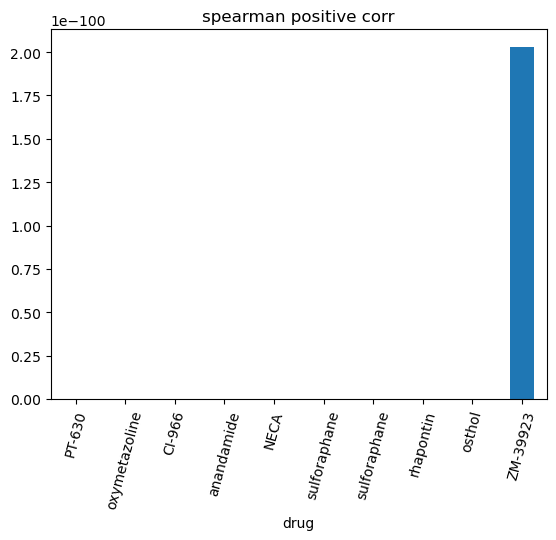

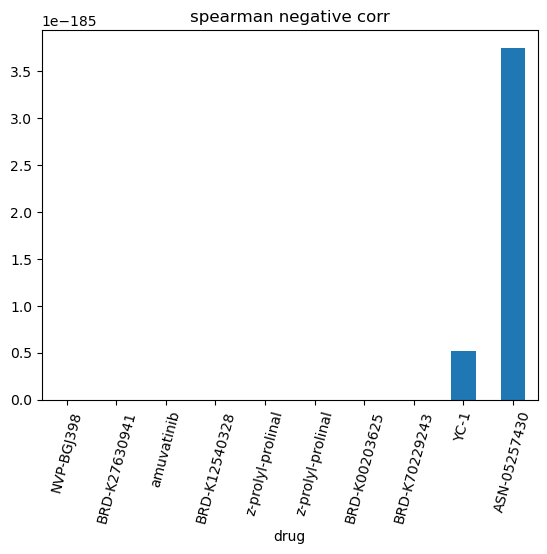

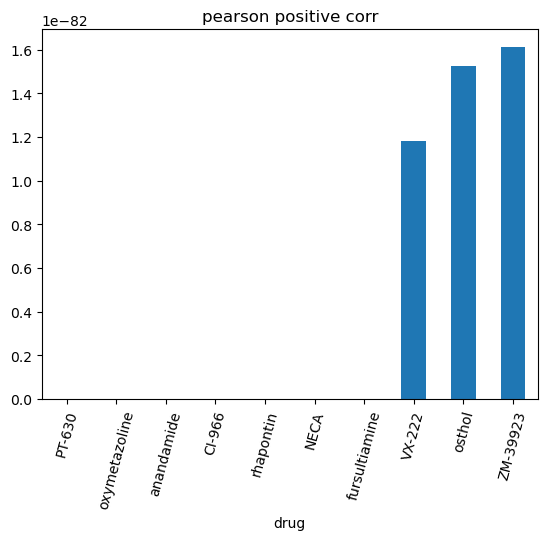

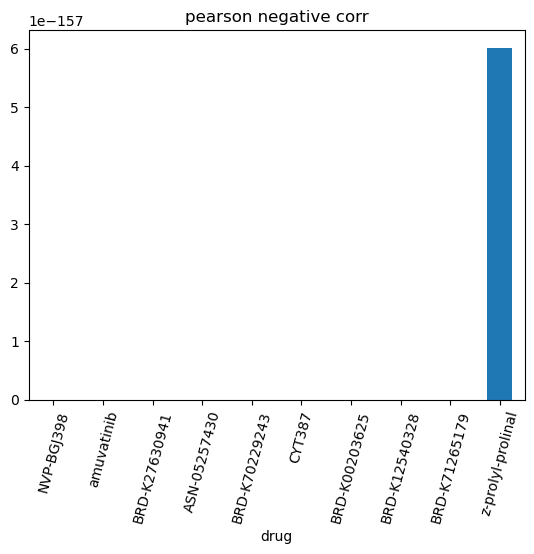

In [59]:
plot_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'spearman', 'spearman_p_value')
plot_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'pearson','pearson_p_value')


In [61]:
# for Cscore
print_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'connectivity_score','cs_p_value', 20)


connectivity_score positive
 drug
BRD-K07790824    0.000
UNC-0321         0.000
ticlopidine      0.000
BRD-K06623064    0.000
ticlopidine      0.000
ZM-323881        0.000
tribenoside      0.000
dasatinib        0.000
cirazoline       0.000
PP-2             0.000
PCI-24781        0.001
tribenoside      0.001
BRD-K64024097    0.001
pirlindole       0.001
BRD-K10057859    0.002
neratinib        0.002
AZD-1480         0.002
SJB-shh-31       0.002
BRD-K64024097    0.002
BRD-K52831896    0.002
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
doramapimod       0.000
flutamide         0.000
met-leu-phe       0.000
solifenacin       0.000
ICI-204448        0.000
hydrastinine      0.000
BRD-K35568648     0.001
dephostatin       0.001
nateglinide       0.001
austricine        0.001
irilin-a          0.002
BRD-K28366444     0.002
cytochalasin-d    0.002
BRD-K55896799     0.003
paroxetine        0.003
reserpic-acid     0.003
L-670596          0.003
AC-55649          0.003
NCH-5

In [62]:
print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)

print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='24h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)

print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)


connectivity_score positive
 drug
BRD-K07790824    0.000
ticlopidine      0.000
ticlopidine      0.000
ZM-323881        0.000
PP-2             0.000
BRD-K06623064    0.000
pirlindole       0.001
PCI-24781        0.001
SJB-shh-31       0.002
neratinib        0.002
BRD-K10057859    0.002
BRD-K52831896    0.002
AZD-7762         0.004
BRD-K29345712    0.004
BRD-K51557114    0.004
foretinib        0.005
fenbendazole     0.006
clopidogrel      0.006
AMG-9810         0.006
isoxicam         0.006
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
cytochalasin-d    0.002
TUL-XIX029        0.005
BRD-K08307026     0.007
risperidone       0.008
BRL-52537         0.010
O-2050            0.011
vesamicol         0.015
NBI-27914         0.016
mebeverine        0.017
BRD-K16057611     0.017
cardiogenol-c     0.018
vesamicol         0.019
fexaramine        0.019
BRD-K32862555     0.020
BRD-A24054354     0.020
TW-37             0.021
BRD-K33676730     0.023
BNTX              0.024
neuro

# Correlation tra mith e DEG cs?
sempre usando solo 6h 24hDEG_cs_data

In [14]:
stats.pearsonr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data.sort_values(by='drug')['connectivity_score'])

PearsonRResult(statistic=0.017773745044366105, pvalue=0.07165439854252896)

In [15]:
stats.spearmanr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data.sort_values(by='drug')['connectivity_score'])

SignificanceResult(statistic=0.013842960848149063, pvalue=0.16064884514981276)

# Random sampling of REG distribution:

In [ ]:
from scipy.stats import ks_2samp

In [45]:
from connectivity_score import montecarlo_connectivity, calculate_RGES

r=9892#1000#14812#

# Length of disease up regulated signature:
# set to sup=int(r/2) to sample drug spectrum
s_up=int(r/2)#10#7884#4455

# Length of disease up regulated signature:
# set to sup=int(r/2) to sample drug spectrum
s_down=int(r/2)#10#6928#3954

# Number of random iterations:
n_iterations=3222

random_RGES_dist=np.round(montecarlo_connectivity(s_up, s_down, r, n_iterations), 3)

# fatto da  coso


# Compare random sampling distribution of RGES with DEG based RGED and mith based RGS

In [51]:
print(ks_2samp(random_RGES_dist, DEG_cs_data.sort_values(by='drug')['connectivity_score']))
print(ks_2samp(random_RGES_dist, mith_cs_data.sort_values(by='drug')['connectivity_score']))

KstestResult(statistic=0.04341048254697555, pvalue=0.00018706468662395422, statistic_location=1.9739942628150853, statistic_sign=-1)
KstestResult(statistic=0.19199795361330108, pvalue=1.1300879108478887e-79, statistic_location=-1.975008554877665, statistic_sign=-1)


In [55]:
print(ks_2samp(random_RGES_dist, DEG_cs_data_mg.sort_values(by='drug')['connectivity_score']))
print(ks_2samp(random_RGES_dist, mith_cs_data_mg.sort_values(by='drug')['connectivity_score']))

KstestResult(statistic=0.12462634794043803, pvalue=1.2219168466234415e-33, statistic_location=1.964999598948104, statistic_sign=-1)
KstestResult(statistic=0.12009102259542465, pvalue=2.930188648202195e-31, statistic_location=-1.9700268549300173, statistic_sign=-1)


# Compara DEG connectivity score scon DEG connectivity scores di catalano